# Building a vaginal Microbial Community Metabolic Model

Author: Vi Varga

Prepared: August 2025

Course: FKBT190 Advanced Technologies in Bioscience


## Descriptions

README file for tracking progress of course project for FKBT190 (Advanced Technologies in Bioscience), 4 ECTS in MCMMs. 

The general project design will be as follows: 
 - Download of genetic data for 3-5 bacteria
   - If needed, perform genome assembly & gene prediction
   - Possibly, download GEM or other genetic information for vaginal epithelial cells
 - Predict GEMs for selected organisms using the RAVEN Toolbox in MATLAB
   - See the `MCMM_GEMs_withRaven.mlx` file for the full workflow
 - Create MCMM using PyCoMo (Predl et al. 2024)
     - Documentation: https://univiecube.github.io/PyCoMo/index.html
     - Associated publication: Predl, M., Mießkes, M., Rattei, T., & Zanghellini, J. (2024). PyCoMo: a python package for community metabolic model creation and analysis. Bioinformatics, 40(4). https://doi.org/10.1093/bioinformatics/btae153


## Key references

General methodology & background: 
 - Ardalani, O., Phaneuf, P. v., Mohite, O. S., Nielsen, L. K., & Palsson, B. O. (2024).  Pangenome reconstruction of Lactobacillaceae metabolism predicts species-specific metabolic traits. MSystems, 9(7). https://doi.org/10.1128/MSYSTEMS.00156-24/SUPPL_FILE/MSYSTEMS.00156-24-S0008.DOCX
 - Diener, C., & Gibbons, S. M. (2023). More is Different: Metabolic Modeling of Diverse Microbial Communities. MSystems, 8(2). https://doi.org/10.1128/msystems.01270-22
 - Dillard, L. R., Glass, E. M., Lewis, A. L., Thomas-White, K., Papin, J. A., & Bucci, V. (2025). Metabolic Network Models of the Gardnerella Pangenome Identify Key Interactions with the Vaginal Environment. https://doi.org/10.1128/msystems.00689-22
 - Fondi, M., & Liò, P. (2015). Genome-scale metabolic network reconstruction. Methods in Molecular Biology, 1231, 233–256. https://doi.org/10.1007/978-1-4939-1720-4_15
 - Lambert, A., Budinich, M., Mahé, M., Chaffron, S., & Eveillard, D. (2024). Community metabolic modeling of host-microbiota interactions through multi-objective optimization. IScience, 27(6). https://doi.org/10.1016/j.isci.2024.110092
 - Mendoza, S. N., Olivier, B. G., Molenaar, D., & Teusink, B. (2019). A systematic assessment of current genome-scale metabolic reconstruction tools. Genome Biology, 20(1). https://doi.org/10.1186/s13059-019-1769-1
 - Mengoni, A., Galardini, M., & Fondi, M. (n.d.). Bacterial Pangenomics Methods and Protocols Methods in Molecular Biology 1231. http://www.springer.com/series/7651
 - National Center for Biotechnology Information (NCBI)[Internet]. (1988). Bethesda (MD): National Library of Medicine (US), National Center for Biotechnology Information.
 - Predl, M., Mießkes, M., Rattei, T., & Zanghellini, J. (2024). PyCoMo: a python package for community metabolic model creation and analysis. Bioinformatics, 40(4). https://doi.org/10.1093/bioinformatics/btae153
 - Quinn-Bohmann, N., Carr, A. v., Diener, C., & Gibbons, S. M. (2025). Moving from genome-scale to community-scale metabolic models for the human gut microbiome. Nature Microbiology, 10(5), 1055–1066. https://doi.org/10.1038/s41564-025-01972-2
 - Robinson, J. L., Kocabaş, P., Wang, H., Cholley, P. E., Cook, D., Nilsson, A., Anton, M., Ferreira, R., Domenzain, I., Billa, V., Limeta, A., Hedin, A., Gustafsson, J., Kerkhoven, E. J., Svensson, L. T., Palsson, B. O., Mardinoglu, A., Hansson, L., Uhlén, M., & Nielsen, J. (2020). An Atlas of Human Metabolism. Science Signaling, 13(624), eaaz1482. https://doi.org/10.1126/SCISIGNAL.AAZ1482
 - Wang, H. I., Marciš auskas, S. I., Sá nchez ID, B. J., Domenzain, I. I., Hermansson, D., Agren, R., NielsenID, J., & KerkhovenID, E. J. (2018). RAVEN 2.0: A versatile toolbox for metabolic network reconstruction and a case study on Streptomyces coelicolor. https://doi.org/10.1371/journal.pcbi.1006541

Data sources: 
 - Human-GEM: https://github.com/SysBioChalmers/Human-GEM
 - Organism FASTA files were downloaded from the NCBI


## Environmnent

All programs used in the analysis have been installed in the `env-GEM-MCMM` `conda` environment, which can be activated like so: 

```bash
#conda create -n env-GEM-MCMM python pycomo pandas cobra ipykernel nb_conda_kernels matplotlib networkx tqdm seaborn
conda activate env-GEM-MCMM
```


## Data download

Using genetic information for the following cells: 
 - _Lactobacillus crispatus_
 - _Lactobacillus iners_
 - _Prevotella bivia_ (BV-associated bacteria)
   - Note: Originally searched for _Prevotella timonensis_, but did not find NCBI genome for it
 - _Gardnerella vaginalis_ (BV-associated bacteria)
 - _Homo sapiens sapiens_ (vaginal epithelial cells)
   - Human-GEM: https://github.com/SysBioChalmers/Human-GEM
 - _Trichomonas vaginalis_ (Eukaryotic STI)

All data was downloaded to the `Data/` directory on 10.08.2025:

```bash
# Human-GEM
# source: https://github.com/SysBioChalmers/Human-GEM
git clone https://github.com/SysBioChalmers/Human-GEM.git
###
# for bacteria & trich, downloaded NCBI FASTA datasets
```

Data wrangling with Python script:

In [1]:
%%script false --no-raise-error
#%%bash
# the %%bash is commented out to avoid these initial source files being overwritten
# gardnerella vaginalis
python Scripts/assignFASTAheaders_GEMs.py Data/gardnerella_vaginalis_GCF_001042655-1_prots.faa Gvaginalis
# lactobacillus crispatus
python Scripts/assignFASTAheaders_GEMs.py Data/lactobacillus_crispatus_GCF_009769205-1_prots.faa Lcrispatus
# lactobacillus iners
python Scripts/assignFASTAheaders_GEMs.py Data/lactobacillus_iners_GCF_011058775-1_prots.faa Liners
# prevotella bivia
python Scripts/assignFASTAheaders_GEMs.py Data/prevotella_bivia_GCF_000262545-1_prots.faa Pbivia
# trichomonas vaginalis
python Scripts/assignFASTAheaders_GEMs.py Data/trichomonas_vaginalis_GCF_026262505-1_prots.faa Tvaginalis

In [2]:
%%bash
# sanity checks
grep -c ">" Data/*.faa
# this totals to 78617, which is the number of lines in the encoding reference file

Data/gardnerella_vaginalis_GCF_001042655-1_prots.faa:1259
Data/lactobacillus_crispatus_GCF_009769205-1_prots.faa:1864
Data/lactobacillus_iners_GCF_011058775-1_prots.faa:1173
Data/prevotella_bivia_GCF_000262545-1_prots.faa:2031
Data/trichomonas_vaginalis_GCF_026262505-1_prots.faa:72290


In [3]:
%%bash
# sanity checks
grep -c ">" Data/*.fasta

Data/gardnerella_vaginalis_GCF_001042655-1_prots_edit.fasta:1259
Data/lactobacillus_crispatus_GCF_009769205-1_prots_edit.fasta:1864
Data/lactobacillus_iners_GCF_011058775-1_prots_edit.fasta:1173
Data/prevotella_bivia_GCF_000262545-1_prots_edit.fasta:2031
Data/trichomonas_vaginalis_GCF_026262505-1_prots_edit.fasta:72290


Based on the cleaned FASTA files, I used the RAVEN Toolbox in MATLAB to generate draft GEMs for use in the MCMMs. 

## MCMM with PyCoMo

### Sanity checks

Prior to importing the GEMs into the PyCoMo, a few quick sanity checks on the predicted GEMs: 

In [4]:
# sanity checks
from cobra.io.sbml import validate_sbml_model #import the validation module

model, errors = validate_sbml_model("Models/Lcrispatus_draftGEM_v4.xml")
print(errors)   # shows all invalid IDs etc.

model, errors = validate_sbml_model("Models/Liners_draftGEM_v4.xml")
print(errors)   # shows all invalid IDs etc.

model, errors = validate_sbml_model("Models/Gvaginalis_draftGEM_v4.xml")
print(errors)   # shows all invalid IDs etc.

model, errors = validate_sbml_model("Models/Pbivia_draftGEM_v4.xml")
print(errors)   # shows all invalid IDs etc.

model, errors = validate_sbml_model("Models/Tvaginalis_draftGEM_v4.xml")
print(errors)   # shows all invalid IDs etc.

model, errors = validate_sbml_model("Models/Human-GEM_KEGG.xml")
print(errors)   # shows all invalid IDs etc.

{'SBML_FATAL': [], 'SBML_ERROR': [], 'SBML_SCHEMA_ERROR': [], 'SBML_WARNING': [], 'COBRA_FATAL': [], 'COBRA_ERROR': [], 'COBRA_WARNING': [], 'COBRA_CHECK': []}
{'SBML_FATAL': [], 'SBML_ERROR': [], 'SBML_SCHEMA_ERROR': [], 'SBML_WARNING': [], 'COBRA_FATAL': [], 'COBRA_ERROR': [], 'COBRA_WARNING': [], 'COBRA_CHECK': []}
{'SBML_FATAL': [], 'SBML_ERROR': [], 'SBML_SCHEMA_ERROR': [], 'SBML_WARNING': [], 'COBRA_FATAL': [], 'COBRA_ERROR': [], 'COBRA_WARNING': [], 'COBRA_CHECK': []}
{'SBML_FATAL': [], 'SBML_ERROR': [], 'SBML_SCHEMA_ERROR': [], 'SBML_WARNING': [], 'COBRA_FATAL': [], 'COBRA_ERROR': [], 'COBRA_WARNING': [], 'COBRA_CHECK': []}
{'SBML_FATAL': [], 'SBML_ERROR': [], 'SBML_SCHEMA_ERROR': [], 'SBML_WARNING': [], 'COBRA_FATAL': [], 'COBRA_ERROR': [], 'COBRA_WARNING': [], 'COBRA_CHECK': []}


SBML warnings in validation, check error log for details.


{'SBML_FATAL': [], 'SBML_ERROR': [], 'SBML_SCHEMA_ERROR': [], 'SBML_WARNING': ['E0 (Warning): General SBML conformance (core, L9); RDF does not contain valid ModelHistory; LibSBML expected to read the annotation into a ModelHistory object. Unfortunately, some attributes were not present or correct and the resulting ModelHistory object will not correctly produce the annotation.  \nReference: L3V1 Section 6.3\n An invalid ModelHistory element has been stored.\n', 'E1 (Warning): General SBML conformance (core, L3); RDF does not contain valid ModelHistory; LibSBML expected to read the annotation into a ModelHistory object. Unfortunately, some attributes were not present or correct and the resulting ModelHistory object will not correctly produce the annotation.  \nReference: L3V1 Section 6.3\n An invalid ModelHistory element has been stored.\n'], 'COBRA_FATAL': [], 'COBRA_ERROR': [], 'COBRA_WARNING': [], 'COBRA_CHECK': []}


## Initial FBA

Prior to attempting community assembly, I will perform flux balance analysis on the individual GEMs. As FBA has already been performed in MATLAB, this is process is repeated here partly as a sanity check and partly for the sake of generating visualizations of FBA results.

In [5]:
# module loading cell
import cobra
import matplotlib.pyplot as plt

In [6]:
# Load a genome-scale metabolic model (GEM) from SBML format
model = cobra.io.read_sbml_model("Models/Gvaginalis_draftGEM_v4.xml")

# Find all reactions with "biomass" in their ID (case-insensitive)
biomass_rxns = [r for r in model.reactions if "biomass" in r.id.lower()]
print("Biomass reactions:", [r.id for r in biomass_rxns])

# Set the first biomass reaction as the objective function
model.objective = biomass_rxns[0]

# Run flux balance analysis (FBA) optimization
sol = model.optimize()

# Print the optimal biomass flux value
print("Biomass flux:", sol.objective_value)

Biomass reactions: ['BIOMASS_ps']
Biomass flux: 36.585365853658345


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


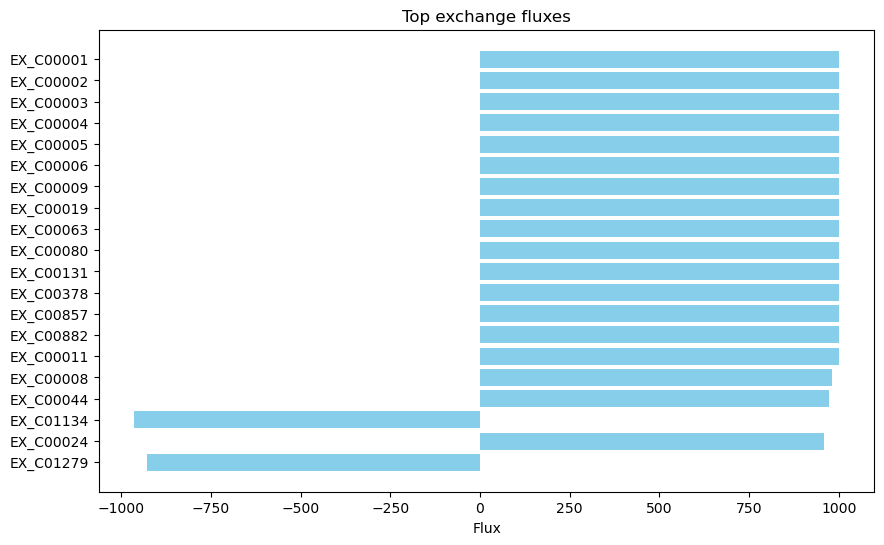

In [7]:
# Collect all exchange reaction fluxes from the solution
# Convention: uptake fluxes are negative, secretion fluxes are positive
ex_fluxes = [(r.id, sol.fluxes[r.id]) for r in model.exchanges]

# Keep only fluxes that are nonzero (above a tiny tolerance)
ex_fluxes = [(rid, f) for rid, f in ex_fluxes if abs(f) > 1e-9]

# Sort fluxes by absolute value, largest first
ex_fluxes.sort(key=lambda x: abs(x[1]), reverse=True)

# Plot the top N exchange fluxes
N = 20
rxns, fluxes = zip(*ex_fluxes[:N])  # split IDs and flux values

plt.figure(figsize=(10,6))
plt.barh(rxns, fluxes, color="skyblue")  # horizontal bar chart
plt.xlabel("Flux")
plt.title("Top exchange fluxes")
plt.gca().invert_yaxis()  # flip axis so largest flux is at top
plt.show()

In [8]:
# Load the GEM
model = cobra.io.read_sbml_model("Models/Human-GEM_KEGG.xml")

# Find the biomass metabolite
biomass_met = None
for m in model.metabolites:
    if "biomass" in (m.name or "").lower() or "BIOMASS" in (m.id or ""):
        biomass_met = m
        break

if biomass_met is None:
    raise ValueError("No biomass metabolite found in the model")

print("Biomass metabolite found:", biomass_met.id, biomass_met.name)

# Find reactions that produce biomass
biomass_rxns = [r for r in biomass_met.reactions if biomass_met in r.products]

if not biomass_rxns:
    raise ValueError("No reaction producing the biomass metabolite found")

# Set the first reaction that produces biomass as the objective
model.objective = biomass_rxns[0]
print("Objective reaction set to:", biomass_rxns[0].id)

# Run FBA
sol = model.optimize()
print("Biomass flux:", sol.objective_value)

Biomass metabolite found: MAM03970c biomass
Objective reaction set to: MAR13082
Biomass flux: 124.86814837744573


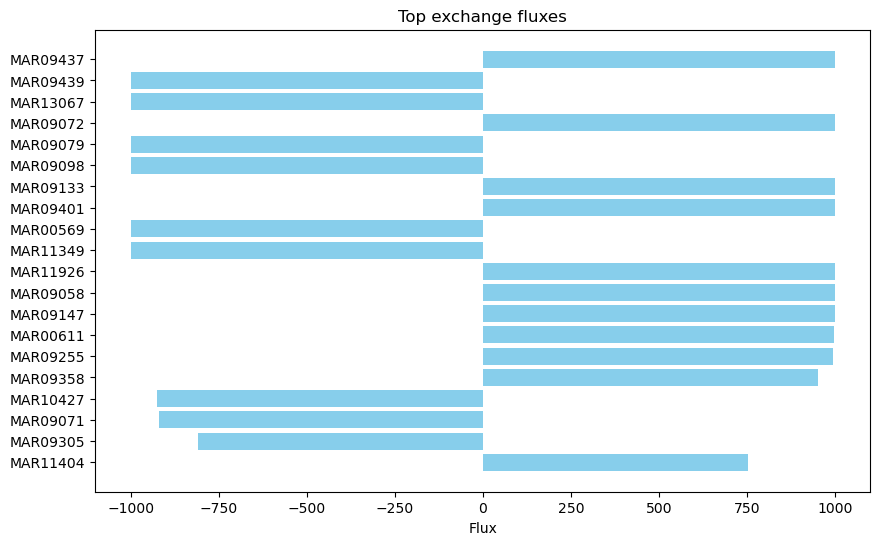

In [9]:
# Collect all exchange reaction fluxes from the solution
# Convention: uptake fluxes are negative, secretion fluxes are positive
ex_fluxes = [(r.id, sol.fluxes[r.id]) for r in model.exchanges]

# Keep only fluxes that are nonzero (above a tiny tolerance)
ex_fluxes = [(rid, f) for rid, f in ex_fluxes if abs(f) > 1e-9]

# Sort fluxes by absolute value, largest first
ex_fluxes.sort(key=lambda x: abs(x[1]), reverse=True)

# Plot the top N exchange fluxes
N = 20
rxns, fluxes = zip(*ex_fluxes[:N])  # split IDs and flux values

plt.figure(figsize=(10,6))
plt.barh(rxns, fluxes, color="skyblue")  # horizontal bar chart
plt.xlabel("Flux")
plt.title("Top exchange fluxes")
plt.gca().invert_yaxis()  # flip axis so largest flux is at top
plt.show()

In [10]:
# Load a genome-scale metabolic model (GEM) from SBML format
model = cobra.io.read_sbml_model("Models/Lcrispatus_draftGEM_v4.xml")

# Find all reactions with "biomass" in their ID (case-insensitive)
biomass_rxns = [r for r in model.reactions if "biomass" in r.id.lower()]
print("Biomass reactions:", [r.id for r in biomass_rxns])

# Set the first biomass reaction as the objective function
model.objective = biomass_rxns[0]

# Run flux balance analysis (FBA) optimization
sol = model.optimize()

# Print the optimal biomass flux value
print("Biomass flux:", sol.objective_value)

Biomass reactions: ['BIOMASS_ps']
Biomass flux: 33.70786516853931


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


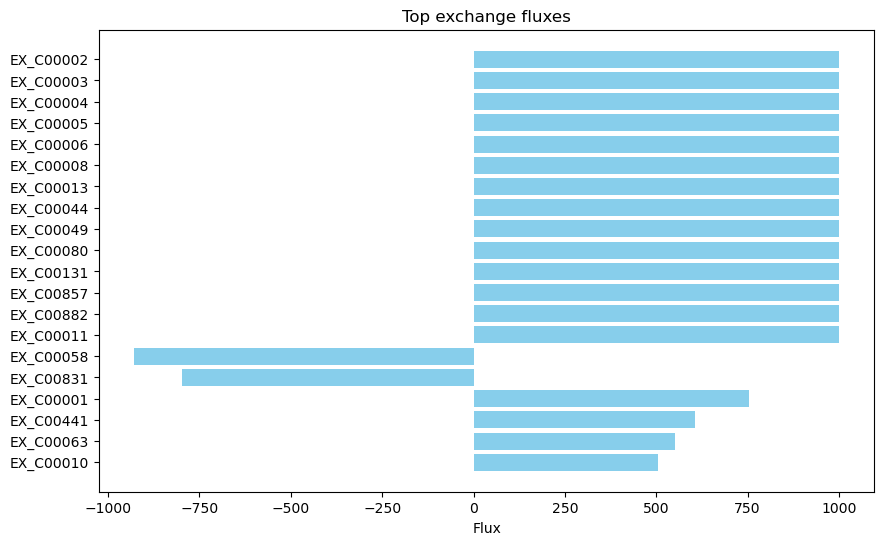

In [11]:
# Collect all exchange reaction fluxes from the solution
# Convention: uptake fluxes are negative, secretion fluxes are positive
ex_fluxes = [(r.id, sol.fluxes[r.id]) for r in model.exchanges]

# Keep only fluxes that are nonzero (above a tiny tolerance)
ex_fluxes = [(rid, f) for rid, f in ex_fluxes if abs(f) > 1e-9]

# Sort fluxes by absolute value, largest first
ex_fluxes.sort(key=lambda x: abs(x[1]), reverse=True)

# Plot the top N exchange fluxes
N = 20
rxns, fluxes = zip(*ex_fluxes[:N])  # split IDs and flux values

plt.figure(figsize=(10,6))
plt.barh(rxns, fluxes, color="skyblue")  # horizontal bar chart
plt.xlabel("Flux")
plt.title("Top exchange fluxes")
plt.gca().invert_yaxis()  # flip axis so largest flux is at top
plt.show()

In [12]:
# Load a genome-scale metabolic model (GEM) from SBML format
model = cobra.io.read_sbml_model("Models/Liners_draftGEM_v4.xml")

# Find all reactions with "biomass" in their ID (case-insensitive)
biomass_rxns = [r for r in model.reactions if "biomass" in r.id.lower()]
print("Biomass reactions:", [r.id for r in biomass_rxns])

# Set the first biomass reaction as the objective function
model.objective = biomass_rxns[0]

# Run flux balance analysis (FBA) optimization
sol = model.optimize()

# Print the optimal biomass flux value
print("Biomass flux:", sol.objective_value)

Biomass reactions: ['BIOMASS_ps']
Biomass flux: 66.66666666666664


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


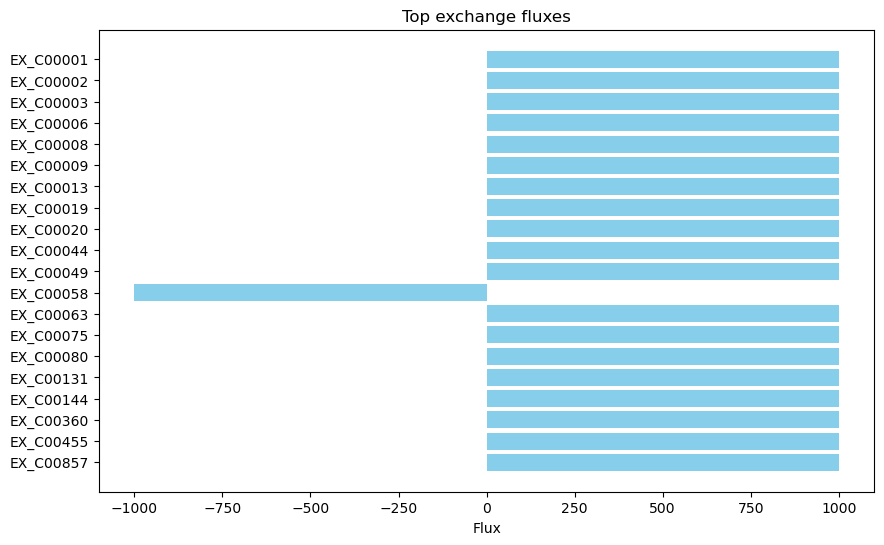

In [13]:
# Collect all exchange reaction fluxes from the solution
# Convention: uptake fluxes are negative, secretion fluxes are positive
ex_fluxes = [(r.id, sol.fluxes[r.id]) for r in model.exchanges]

# Keep only fluxes that are nonzero (above a tiny tolerance)
ex_fluxes = [(rid, f) for rid, f in ex_fluxes if abs(f) > 1e-9]

# Sort fluxes by absolute value, largest first
ex_fluxes.sort(key=lambda x: abs(x[1]), reverse=True)

# Plot the top N exchange fluxes
N = 20
rxns, fluxes = zip(*ex_fluxes[:N])  # split IDs and flux values

plt.figure(figsize=(10,6))
plt.barh(rxns, fluxes, color="skyblue")  # horizontal bar chart
plt.xlabel("Flux")
plt.title("Top exchange fluxes")
plt.gca().invert_yaxis()  # flip axis so largest flux is at top
plt.show()

In [14]:
# Load a genome-scale metabolic model (GEM) from SBML format
model = cobra.io.read_sbml_model("Models/Pbivia_draftGEM_v4.xml")

# Find all reactions with "biomass" in their ID (case-insensitive)
biomass_rxns = [r for r in model.reactions if "biomass" in r.id.lower()]
print("Biomass reactions:", [r.id for r in biomass_rxns])

# Set the first biomass reaction as the objective function
model.objective = biomass_rxns[0]

# Run flux balance analysis (FBA) optimization
sol = model.optimize()

# Print the optimal biomass flux value
print("Biomass flux:", sol.objective_value)

Biomass reactions: ['BIOMASS_ps']
Biomass flux: 25.21008403361345


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


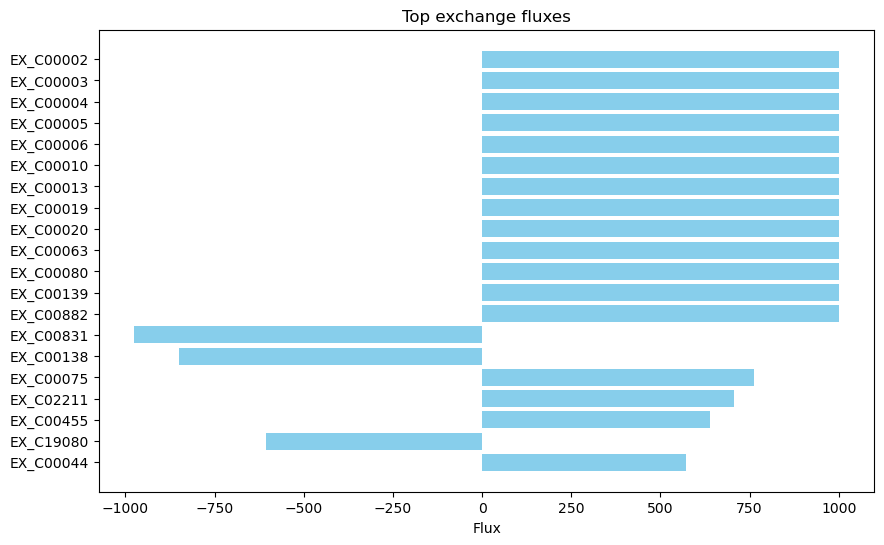

In [15]:
# Collect all exchange reaction fluxes from the solution
# Convention: uptake fluxes are negative, secretion fluxes are positive
ex_fluxes = [(r.id, sol.fluxes[r.id]) for r in model.exchanges]

# Keep only fluxes that are nonzero (above a tiny tolerance)
ex_fluxes = [(rid, f) for rid, f in ex_fluxes if abs(f) > 1e-9]

# Sort fluxes by absolute value, largest first
ex_fluxes.sort(key=lambda x: abs(x[1]), reverse=True)

# Plot the top N exchange fluxes
N = 20
rxns, fluxes = zip(*ex_fluxes[:N])  # split IDs and flux values

plt.figure(figsize=(10,6))
plt.barh(rxns, fluxes, color="skyblue")  # horizontal bar chart
plt.xlabel("Flux")
plt.title("Top exchange fluxes")
plt.gca().invert_yaxis()  # flip axis so largest flux is at top
plt.show()

In [16]:
# Load a genome-scale metabolic model (GEM) from SBML format
model = cobra.io.read_sbml_model("Models/Tvaginalis_draftGEM_v4.xml")

# Find all reactions with "biomass" in their ID (case-insensitive)
biomass_rxns = [r for r in model.reactions if "biomass" in r.id.lower()]
print("Biomass reactions:", [r.id for r in biomass_rxns])

# Set the first biomass reaction as the objective function
model.objective = biomass_rxns[0]

# Run flux balance analysis (FBA) optimization
sol = model.optimize()

# Print the optimal biomass flux value
print("Biomass flux:", sol.objective_value)

Biomass reactions: ['BIOMASS_ps']
Biomass flux: 19.108280254776847


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


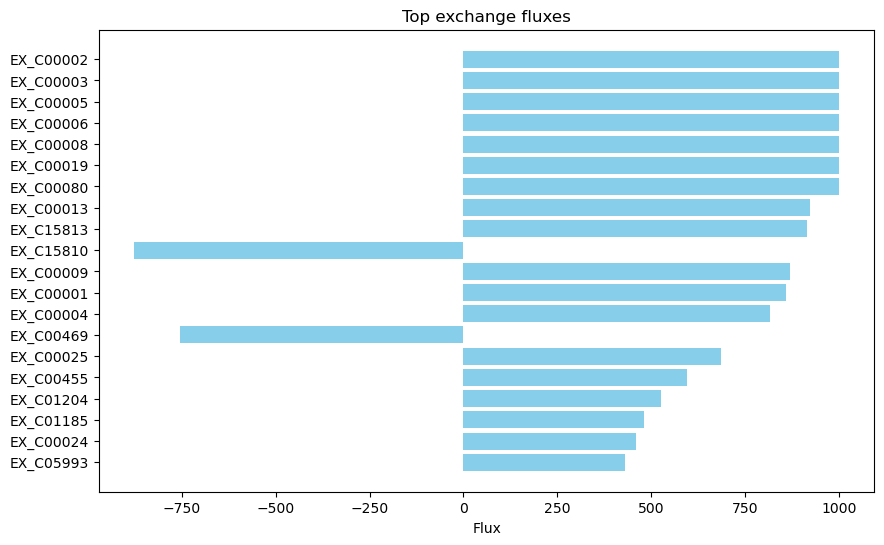

In [17]:
# Collect all exchange reaction fluxes from the solution
# Convention: uptake fluxes are negative, secretion fluxes are positive
ex_fluxes = [(r.id, sol.fluxes[r.id]) for r in model.exchanges]

# Keep only fluxes that are nonzero (above a tiny tolerance)
ex_fluxes = [(rid, f) for rid, f in ex_fluxes if abs(f) > 1e-9]

# Sort fluxes by absolute value, largest first
ex_fluxes.sort(key=lambda x: abs(x[1]), reverse=True)

# Plot the top N exchange fluxes
N = 20
rxns, fluxes = zip(*ex_fluxes[:N])  # split IDs and flux values

plt.figure(figsize=(10,6))
plt.barh(rxns, fluxes, color="skyblue")  # horizontal bar chart
plt.xlabel("Flux")
plt.title("Top exchange fluxes")
plt.gca().invert_yaxis()  # flip axis so largest flux is at top
plt.show()

INTERPRETATION

### Running PyCoMo

PyCoMo allows for the creation of MCMMs in a fairly straightforward way. Unlike COMETS, the PyCoMo doesn't take into consideration spatial relations between organisms in the environment, and the medium doesn't have to be defined. As a result, it's a good choice for building an exploratory MCMM. 

In [18]:
# module loading cell - all modules necessary for PyCoMo
import pandas as pd
import re
import numpy as np
from tqdm import tqdm
from collections import Counter
import copy
from pathlib import Path
import sys
import cobra
from cobra.core.gene import GPR
from cobra import Reaction
from cobra import Metabolite
from cobra import Model
from cobra.flux_analysis import single_reaction_deletion
from cobra.io.sbml import validate_sbml_model
import networkx as nx
import matplotlib.pyplot as plt

In [19]:
# importing pycomo module & setting it up
import pycomo
import pycomo.pycomo_models as pcm
pycomo.configure_logger(level="info")

2025-09-04 10:46:34,404 - pycomo - INFO - Logger initialized.
2025-09-04 10:46:34,407 - pycomo - INFO - Process Pool Logger initialized.
2025-09-04 10:46:34,408 - pycomo - INFO - Utils Logger initialized.
2025-09-04 10:46:34,410 - pycomo - INFO - Multiprocess Logger initialized.
2025-09-04 10:46:34,411 - pycomo - INFO - Log level set to info


In [20]:
# setting up the model directory
pycomo_model_dir = "./Models/"
named_models = pycomo.load_named_models_from_dir(pycomo_model_dir)
# check the model contents
named_models

{'Gvaginalis_draftGEM_v4': <Model GvaginalisDraft at 0x7d535fee5390>,
 'Human-GEM_KEGG': <Model HumanGEM at 0x7d535fee4130>,
 'Lcrispatus_draftGEM_v4': <Model LcrispatusDraft at 0x7d534576bad0>,
 'Liners_draftGEM_v4': <Model LinersDraft at 0x7d534a937290>,
 'Pbivia_draftGEM_v4': <Model PbiviaDraft at 0x7d534a937110>,
 'Tvaginalis_draftGEM_v4': <Model TvaginalisDraft at 0x7d5343715f10>}

In [21]:
# check the objective functions of the models
for model in named_models.values():
    print(model.objective)
# checking the results, all of these are biomass functions

Maximize
1.0*BIOMASS_ps - 1.0*BIOMASS_ps_reverse_17d83
Maximize
1.0*MAR13082 - 1.0*MAR13082_reverse_11d67
Maximize
1.0*BIOMASS_ps - 1.0*BIOMASS_ps_reverse_17d83
Maximize
1.0*BIOMASS_ps - 1.0*BIOMASS_ps_reverse_17d83
Maximize
1.0*BIOMASS_ps - 1.0*BIOMASS_ps_reverse_17d83
Maximize
1.0*BIOMASS_ps - 1.0*BIOMASS_ps_reverse_17d83


At this point, all GEMs have been loaded into PyCoMo, so they can be restructured as individual members of a community.

However, there are quite a few changes that need to be made and cleaning steps that ned to be executed in order to ensure compatibility of models with the software. 

In [22]:
def patched_copy(self):
    """
    Patch function to replace cobra.GeneReactionRule (GPR) .copy() method.
    Ensures GPR objects can be shallow-copied even if they use .expression.
    """
    # Create a new GPR object using the expression attribute if it exists,
    # otherwise fall back to an empty GPR
    new_gpr = GPR(self.expression) if hasattr(self, "expression") else GPR()
    return new_gpr

# Monkey-patch the copy methods of GPR class to use the patched version
GPR.copy = patched_copy
GPR.__copy__ = patched_copy

In [23]:
def safe_ensure_compartment_suffix(self, model, inplace=True):
    """
    Modified version of ensure_compartment_suffix that:
      - Appends compartment IDs as suffixes to metabolite and reaction IDs
      - Skips exchange reactions (EX_*) to avoid renaming them
    """
    # Iterate over all metabolites in the model
    for met in model.metabolites:
        comp = met.compartment
        # If metabolite ID does not already end with its compartment
        if comp not in met.id or not met.id.endswith(f"_{comp}"):
            new_id = f"{met.id}_{comp}"
            # Avoid overwriting an existing metabolite ID
            if new_id not in model.metabolites:
                met.id = new_id

    # Iterate over all reactions in the model
    for rxn in model.reactions:
        # Skip exchange reactions to preserve their IDs
        if rxn.id.startswith("EX_"):
            continue

        # Collect unique compartments of metabolites participating in the reaction
        met_comps = list({m.compartment for m in rxn.metabolites})
        if not met_comps:
            continue
        comp = met_comps[0]  # assume single dominant compartment
        # If reaction ID does not already end with the compartment
        if comp not in rxn.id or not rxn.id.endswith(f"_{comp}"):
            new_id = f"{rxn.id}_{comp}"
            # Avoid overwriting an existing reaction ID
            if new_id not in model.reactions:
                rxn.id = new_id

    return model

# Monkey-patch the method into SingleOrganismModel
pcm.SingleOrganismModel.ensure_compartment_suffix = safe_ensure_compartment_suffix

In [24]:
# Run the model creation code
single_org_models = []

# Loop over each named GEM (dictionary of {name: model})
for name, model in named_models.items():
    print(name)  # print model name for progress tracking
    
    # Wrap the cobra model into a SingleOrganismModel (pyCoMo format)
    single_org_model = pycomo.SingleOrganismModel(model, name)
    
    # Collect for later use (e.g., building communities)
    single_org_models.append(single_org_model)

Gvaginalis_draftGEM_v4
Human-GEM_KEGG


2025-09-04 10:46:55,253 - pycomo - WARNING - Warning: model name Human-GEM_KEGG is not compliant with sbml id standards and was changed to Human_GEM_KEGG


Lcrispatus_draftGEM_v4
Liners_draftGEM_v4
Pbivia_draftGEM_v4
Tvaginalis_draftGEM_v4


The community of individuals has now been created, but assembly of the full community model showed a variety of issues with the structures of these models. The following cells debug these issues so that the MCMM can be built.

In [25]:
# Loop through each SingleOrganismModel
for model in single_org_models:
    # Loop through all metabolites in the underlying cobra model
    for met in model.model.metabolites:
        # If metabolite is in extracellular compartment ("e") 
        # but its ID does not end with "_e"
        if met.compartment == "e" and not met.id.endswith("_e"):
            # Fix by appending "_e" to the metabolite ID
            met.id = met.id + "_e"

In [26]:
# Loop through each SingleOrganismModel
for model in single_org_models:
    # Loop through all metabolites in the model
    for met in model.model.metabolites:
        # Check if the metabolite is extracellular ("e")
        # and its ID is NOT present in the model's exchange metabolite mapping dictionary
        if met.compartment == "e" and met.id not in model._exchange_met_name_conversion:
            # Report missing mapping
            print(f"Missing mapping for: {met.id}")

Missing mapping for: MAM00001e_e
Missing mapping for: MAM00002e_e
Missing mapping for: MAM00003e_e
Missing mapping for: MAM00008e_e
Missing mapping for: MAM00010e_e
Missing mapping for: MAM00017e_e
Missing mapping for: MAM00019e_e
Missing mapping for: MAM00021e_e
Missing mapping for: MAM00032e_e
Missing mapping for: MAM00035e_e
Missing mapping for: MAM00077e_e
Missing mapping for: MAM00094e_e
Missing mapping for: MAM00097e_e
Missing mapping for: MAM00104e_e
Missing mapping for: MAM00111e_e
Missing mapping for: MAM00114e_e
Missing mapping for: MAM00115e_e
Missing mapping for: MAM00117e_e
Missing mapping for: MAM00128e_e
Missing mapping for: MAM00132e_e
Missing mapping for: MAM00135e_e
Missing mapping for: MAM00157e_e
Missing mapping for: MAM00179e_e
Missing mapping for: MAM00186e_e
Missing mapping for: MAM00204e_e
Missing mapping for: MAM00228e_e
Missing mapping for: MAM00234e_e
Missing mapping for: MAM00241e_e
Missing mapping for: MAM00242e_e
Missing mapping for: MAM00260e_e
Missing ma

In [27]:
# Loop through each SingleOrganismModel
for model in single_org_models:
    # Check if the metabolite ID "Acetylated_Acetyl_Acceptors" exists in the model
    if "Acetylated_Acetyl_Acceptors" in [m.id for m in model.model.metabolites]:
        # Retrieve the metabolite object by its ID
        met = model.model.metabolites.get_by_id("Acetylated_Acetyl_Acceptors")
        # Print its ID, name, and compartment
        print(met.id, met.name, met.compartment)

In [28]:
# Loop through each SingleOrganismModel
for model in single_org_models:
    # Iterate over all metabolites in the model
    for met in model.model.metabolites:
        # If the metabolite is assigned to compartment 's'
        if met.compartment == "s":
            # Reassign it to compartment 'e'
            met.compartment = "e"

In [29]:
# Loop through each SingleOrganismModel
for model in single_org_models:
    # Check if "Glucopyranose" metabolite exists in the model
    if "Glucopyranose" in [m.id for m in model.model.metabolites]:
        # Retrieve the metabolite object
        met = model.model.metabolites.get_by_id("Glucopyranose")
        # Collect all associated exchange reactions
        exch_rxns = [rxn for rxn in met.reactions if "EX_" in rxn.id or rxn.id.endswith("_exchange")]
        # Print metabolite info and its exchange reactions
        print(met.id, met.compartment, len(exch_rxns), [r.id for r in exch_rxns])

In [30]:
# Loop through each SingleOrganismModel
for model in single_org_models:
    # Print all metabolite IDs that contain "Glucopyranose"
    print([m.id for m in model.model.metabolites if "Glucopyranose" in m.id])

[]
[]
[]
[]
[]
[]


In [31]:
# Loop through each single organism model
for model in single_org_models:
    try:
        # Try to get the metabolite "Glucopyranose"
        met = model.model.metabolites.get_by_id("Glucopyranose")
    except KeyError:
        continue  # Skip this model if metabolite not found

    # Check if an exchange reaction for this metabolite already exists
    if not any("EX_" in rxn.id for rxn in met.reactions):
        # Create a new exchange reaction
        ex_rxn = Reaction(f"EX_{met.id}")
        ex_rxn.add_metabolites({met: -1})  # convention: uptake negative
        ex_rxn.lower_bound = -1000        # allow uptake
        ex_rxn.upper_bound = 1000         # allow secretion
        # Add the reaction to the model
        model.model.add_reactions([ex_rxn])

In [32]:
# Collect all unique metabolite IDs across all single organism models
all_met_ids = set()
for model in single_org_models:
    all_met_ids.update([m.id for m in model.model.metabolites])

# Ensure that each model contains all metabolites in the shared compartment
for model in single_org_models:
    existing_ids = set(m.id for m in model.model.metabolites)
    missing_ids = all_met_ids - existing_ids  # metabolites missing in this model
    for met_id in missing_ids:
        # Add a new metabolite with the same ID, using a default compartment 's'
        met = Metabolite(id=met_id, name=met_id, compartment='s')
        model.model.add_metabolites([met])

In [33]:
# Add exchange reactions for all metabolites that do not already have one
for model in single_org_models:
    for met in model.model.metabolites:
        # Skip if an exchange reaction already exists
        if not any("EX_" in rxn.id for rxn in met.reactions):
            # Create a new exchange reaction for this metabolite
            ex_rxn = Reaction(f"EX_{met.id}")
            ex_rxn.add_metabolites({met: -1})  # convention: uptake = negative
            ex_rxn.lower_bound = -1000        # allow uptake
            ex_rxn.upper_bound = 1000         # allow secretion
            model.model.add_reactions([ex_rxn])

In [34]:
# --- Validate all SBML files before wrapping into PyCoMo ---
for f in Path(pycomo_model_dir).glob("*.xml"):
    # validate_sbml_model returns a tuple (_, errors)
    _, errors = validate_sbml_model(f)
    if errors:
        print(f"Validation errors in {f}:")
        for e in errors:
            print("   ", e)

# --- Check that metabolite IDs end with their compartment suffix ---
def check_suffixes(model, name):
    bad = []
    for met in model.metabolites:
        comp = met.compartment
        if not met.id.endswith(f"_{comp}"):
            bad.append(met.id)  # collect metabolites missing proper suffix
    if bad:
        print(f"[{name}] {len(bad)} metabolites missing proper suffix: {bad[:10]}...")
    return bad

for name, model in named_models.items():
    check_suffixes(model, name)

# --- Check for duplicate metabolite IDs within each model ---
def check_duplicates(model, name):
    seen = {}
    dups = []
    for met in model.metabolites:
        if met.id in seen:
            dups.append(met.id)
        else:
            seen[met.id] = 1
    if dups:
        print(f"[{name}] duplicate metabolite IDs: {set(dups)}")
    return dups

for name, model in named_models.items():
    check_duplicates(model, name)

# --- Spot metabolite IDs appearing in multiple models ---
all_mets = []
for name, model in named_models.items():
    all_mets.extend([m.id for m in model.metabolites])
counts = Counter(all_mets)
cross_dups = [m for m, c in counts.items() if c > 1]  # metabolites present in more than one model
print(f"Cross-model duplicates: {len(cross_dups)} (examples: {cross_dups[:20]})")

Validation errors in Models/Gvaginalis_draftGEM_v4.xml:
    SBML_FATAL
    SBML_ERROR
    SBML_SCHEMA_ERROR
    SBML_WARNING
    COBRA_FATAL
    COBRA_ERROR
    COBRA_WARNING
    COBRA_CHECK


SBML warnings in validation, check error log for details.


Validation errors in Models/Human-GEM_KEGG.xml:
    SBML_FATAL
    SBML_ERROR
    SBML_SCHEMA_ERROR
    SBML_WARNING
    COBRA_FATAL
    COBRA_ERROR
    COBRA_WARNING
    COBRA_CHECK
Validation errors in Models/Lcrispatus_draftGEM_v4.xml:
    SBML_FATAL
    SBML_ERROR
    SBML_SCHEMA_ERROR
    SBML_WARNING
    COBRA_FATAL
    COBRA_ERROR
    COBRA_WARNING
    COBRA_CHECK
Validation errors in Models/Liners_draftGEM_v4.xml:
    SBML_FATAL
    SBML_ERROR
    SBML_SCHEMA_ERROR
    SBML_WARNING
    COBRA_FATAL
    COBRA_ERROR
    COBRA_WARNING
    COBRA_CHECK
Validation errors in Models/Pbivia_draftGEM_v4.xml:
    SBML_FATAL
    SBML_ERROR
    SBML_SCHEMA_ERROR
    SBML_WARNING
    COBRA_FATAL
    COBRA_ERROR
    COBRA_WARNING
    COBRA_CHECK
Validation errors in Models/Tvaginalis_draftGEM_v4.xml:
    SBML_FATAL
    SBML_ERROR
    SBML_SCHEMA_ERROR
    SBML_WARNING
    COBRA_FATAL
    COBRA_ERROR
    COBRA_WARNING
    COBRA_CHECK
[Gvaginalis_draftGEM_v4] 979 metabolites missing proper suffi

Now that all issues have been debugged, the MCMM can be built. 

In [35]:
# create the MCMM
community_name = "pycomo_vaginal_model"
com_model_obj = pycomo.CommunityModel(single_org_models, community_name)
com_model_obj.model

2025-09-04 10:49:08,228 - pycomo - INFO - No community model generated yet. Generating now:
2025-09-04 10:49:08,774 - pycomo - INFO - Identified biomass reaction from objective: BIOMASS_ps
2025-09-04 10:49:08,774 - pycomo - INFO - Note: no products in the objective function, adding biomass to it.
2025-09-04 10:50:22,886 - pycomo - INFO - Identified biomass reaction from objective: MAR13082
2025-09-04 10:50:22,887 - pycomo - INFO - Note: no products in the objective function, adding biomass to it.
2025-09-04 10:53:44,204 - pycomo - WARNING - Matching of the metabolite C04730 is unbalanced (mass and/or charge). Please manually curate this metabolite for a mass and charge balanced model!
2025-09-04 10:53:44,205 - pycomo - WARNING - Matching of the metabolite MAM00486c is unbalanced (mass and/or charge). Please manually curate this metabolite for a mass and charge balanced model!
2025-09-04 10:53:44,205 - pycomo - WARNING - Matching of the metabolite C01962 is unbalanced (mass and/or charg

Name,pycomo_vaginal_model
Memory address,7d531d1bc650
Number of metabolites,111413
Number of reactions,128248
Number of genes,583
Number of groups,111
Objective expression,1.0*community_biomass - 1.0*community_biomass_reverse_44dc1
Compartments,"Gvaginalis_draftGEM_v4_e, Gvaginalis_draftGEM_v4_s, Gvaginalis_draftGEM_v4_medium, medium, fraction_reaction, Human_GEM_KEGG_c, Human_GEM_KEGG_m, Human_GEM_KEGG_x, Human_GEM_KEGG_r, Human_GEM_KEGG_e, Human_GEM_KEGG_l, Human_GEM_KEGG_g, Human_GEM_KEGG_n, Human_GEM_KEGG_i, Human_GEM_KEGG_medium, Human_GEM_KEGG_s, Lcrispatus_draftGEM_v4_e, Lcrispatus_draftGEM_v4_medium, Lcrispatus_draftGEM_v4_s, Liners_draftGEM_v4_e, Liners_draftGEM_v4_medium, Liners_draftGEM_v4_s, Pbivia_draftGEM_v4_e, Pbivia_draftGEM_v4_medium, Pbivia_draftGEM_v4_s, Tvaginalis_draftGEM_v4_e, Tvaginalis_draftGEM_v4_medium, Tvaginalis_draftGEM_v4_s"


The MCMM has been successfully generated, so it can now be analyzed.

In [36]:
# examine the results
com_model_obj.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
Metabolite,Reaction,Flux,C-Number,C-Flux
cpd11416_medium,community_biomass,-1,0,0.00%


In [37]:
# examine the reports - other method
com_model_obj.report()

2025-09-04 11:03:57,580 - pycomo - INFO - Note: The model has more than 5000 reactions. Calculation of loops is skipped, as this would take some time. If needed, please run manually via .get_loops()


Name: pycomo_vaginal_model
------------------
Model overview
Model structure: fixed growth rate
# Metabolites: 111413
# Constraint (f-) Metabolites: 45358
# Model Metabolites: 66055
# Reactions: 128248
# Constraint (f-) Reactions: 45357
# Model Reactions: 82891
# Genes: 583
# Members: 6
Members:
	Gvaginalis_draftGEM_v4
	Human_GEM_KEGG
	Lcrispatus_draftGEM_v4
	Liners_draftGEM_v4
	Pbivia_draftGEM_v4
	Tvaginalis_draftGEM_v4
Objective in direction max:
	1.0*community_biomass - 1.0*community_biomass_reverse_44dc1
------------------
Model quality
# Reactions unbalanced: 13552
# Reactions able to carry flux without a medium: NaN


{'community_name': 'pycomo_vaginal_model',
 'model_structure': 'fixed growth rate',
 'num_metabolites': 111413,
 'num_f_metabolites': 45358,
 'num_model_metabolites': 66055,
 'num_reactions': 128248,
 'num_f_reactions': 45357,
 'num_model_reactions': 82891,
 'num_genes': 583,
 'member_names': ['Gvaginalis_draftGEM_v4',
  'Human_GEM_KEGG',
  'Lcrispatus_draftGEM_v4',
  'Liners_draftGEM_v4',
  'Pbivia_draftGEM_v4',
  'Tvaginalis_draftGEM_v4'],
 'num_members': 6,
 'objective_expression': 1.0*community_biomass - 1.0*community_biomass_reverse_44dc1,
 'objective_direction': 'max',
 'unbalanced_reactions': {<Reaction Gvaginalis_draftGEM_v4_R00597_Gvaginalis_draftGEM_v4_e at 0x7d531cf12570>: {'C': -1.0,
   'H': -2.0},
  <Reaction Gvaginalis_draftGEM_v4_R00619_Gvaginalis_draftGEM_v4_e at 0x7d531cf12620>: {'H': -1.0},
  <Reaction Gvaginalis_draftGEM_v4_R01122_Gvaginalis_draftGEM_v4_e at 0x7d531cbf8d60>: {'C': -5.0,
   'H': -8.0},
  <Reaction Gvaginalis_draftGEM_v4_R01624_Gvaginalis_draftGEM_v4_e

Finally, prior to moving on to the next program, save the model to a file.

In [38]:
%%script false --no-raise-error
# save the model for later
com_model_obj.save("./MCMM__PyCoMo/pycomo_vaginal_model.xml")
# com_model_obj = pycomo.CommunityModel.load("./MCMM__PyCoMo/pycomo_vaginal_model.xml")
# com_model_obj

Now that the results have been saved and the community has been assembled, it's time to do community-level flux balance analysis and visualizations: 

In [39]:
com_model_obj.model.optimize()

,fluxes,reduced_costs
Gvaginalis_draftGEM_v4_R00006_Gvaginalis_draftGEM_v4_e,0.0,0.0
Gvaginalis_draftGEM_v4_R00014_Gvaginalis_draftGEM_v4_e,0.0,0.0
Gvaginalis_draftGEM_v4_R00104_Gvaginalis_draftGEM_v4_e,0.0,0.0
Gvaginalis_draftGEM_v4_R00127_Gvaginalis_draftGEM_v4_e,0.0,0.0
Gvaginalis_draftGEM_v4_R00130_Gvaginalis_draftGEM_v4_e,0.0,0.0
...,...,...
SK_Tvaginalis_draftGEM_v4_EX_G13027_ub,0.0,0.0
SK_Tvaginalis_draftGEM_v4_to_community_biomass_ub,0.0,0.0
f_final,1.0,0.0
abundance_reaction,0.0,0.0


In [40]:
# Run FBA for the community model
flux_df = com_model_obj.run_fba()  # returns a DataFrame with reaction fluxes
print(flux_df.head())  # inspect the first few reactions

# Extract cross-feeding metabolite fluxes between community members
xfeed_df = com_model_obj.cross_feeding_metabolites_from_fba()
print(xfeed_df.head())  # inspect structure

# Prepare dictionary to store biomass flux per community member
biomass_fluxes = {}

# Iterate over each member with a progress bar
for member in tqdm(com_model_obj.get_member_names(), desc="Extracting biomass fluxes"):
    # Identify reactions associated with this member that are biomass reactions
    biomass_rxns = [
        r.id for r in com_model_obj.model.reactions
        if member in r.id and "biomass" in r.id.lower()
    ]
    # Store the flux value for each biomass reaction
    for rxn in biomass_rxns:
        biomass_fluxes[member] = flux_df.loc[rxn, "flux"]

print("Biomass fluxes:", biomass_fluxes)  # display results

                                                                                          reaction_id  \
Gvaginalis_draftGEM_v4_R00006_Gvaginalis_draftG...  Gvaginalis_draftGEM_v4_R00006_Gvaginalis_draft...   
Gvaginalis_draftGEM_v4_R00014_Gvaginalis_draftG...  Gvaginalis_draftGEM_v4_R00014_Gvaginalis_draft...   
Gvaginalis_draftGEM_v4_R00104_Gvaginalis_draftG...  Gvaginalis_draftGEM_v4_R00104_Gvaginalis_draft...   
Gvaginalis_draftGEM_v4_R00127_Gvaginalis_draftG...  Gvaginalis_draftGEM_v4_R00127_Gvaginalis_draft...   
Gvaginalis_draftGEM_v4_R00130_Gvaginalis_draftG...  Gvaginalis_draftGEM_v4_R00130_Gvaginalis_draft...   

                                                    flux  
Gvaginalis_draftGEM_v4_R00006_Gvaginalis_draftG...   0.0  
Gvaginalis_draftGEM_v4_R00014_Gvaginalis_draftG...   0.0  
Gvaginalis_draftGEM_v4_R00104_Gvaginalis_draftG...   0.0  
Gvaginalis_draftGEM_v4_R00127_Gvaginalis_draftG...   0.0  
Gvaginalis_draftGEM_v4_R00130_Gvaginalis_draftG...   0.0  
        metabol

Extracting biomass fluxes: 100%|████████████████████████████████████████████████| 6/6 [00:00<00:00, 70.69it/s]

Biomass fluxes: {'Gvaginalis_draftGEM_v4': np.float64(0.0), 'Human_GEM_KEGG': np.float64(0.0), 'Lcrispatus_draftGEM_v4': np.float64(0.0), 'Liners_draftGEM_v4': np.float64(9.99), 'Pbivia_draftGEM_v4': np.float64(0.0), 'Tvaginalis_draftGEM_v4': np.float64(0.0)}


Biomass reactions used per member:
 - Gvaginalis_draftGEM_v4: BIOMASS_ps_Gvaginalis_draftGEM_v4_medium
 - Human_GEM_KEGG: Human_GEM_KEGG_MAR13082_Human_GEM_KEGG_n
 - Lcrispatus_draftGEM_v4: BIOMASS_ps_Lcrispatus_draftGEM_v4_medium
 - Liners_draftGEM_v4: SK_BIOMASS_ps_Liners_draftGEM_v4_medium_ub
 - Pbivia_draftGEM_v4: BIOMASS_ps_Pbivia_draftGEM_v4_medium
 - Tvaginalis_draftGEM_v4: BIOMASS_ps_Tvaginalis_draftGEM_v4_medium


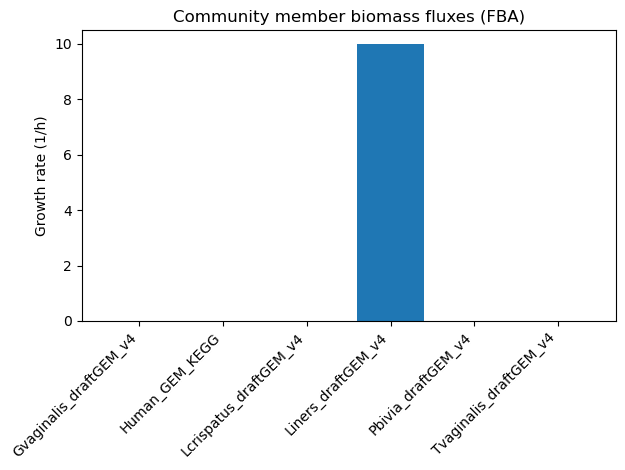

In [41]:
# --- Run FBA on the community model ---
flux_df = com_model_obj.run_fba()  # returns fluxes per reaction

# Normalize to a DataFrame indexed by reaction_id if needed
if isinstance(flux_df, pd.DataFrame):
    if "reaction_id" in flux_df.columns:
        flux_df = flux_df.set_index("reaction_id")
    # Determine the flux column (different versions may use 'flux' or 'value')
    flux_col = "flux" if "flux" in flux_df.columns else ("value" if "value" in flux_df.columns else flux_df.columns[-1])
else:
    # Already a Series; no need to specify flux column
    flux_col = None

# Helper function: identify biomass reactions for a given member by name pattern
def find_member_biomass_rxns(member_name, rxn_ids):
    pat = re.compile(rf"(?i)\bbiom(ass)?\b")  # match "biomass" or "biom"
    candidates = [r for r in rxn_ids if member_name in r and pat.search(r)]
    return candidates

# Get member names and reaction IDs
member_names = com_model_obj.get_member_names()
rxn_ids = list(flux_df.index) if isinstance(flux_df, pd.DataFrame) else list(flux_df.index)

# Dictionaries to store results
biomass_fluxes = {}
biomass_rxn_used = {}

# Loop over members to find biomass reactions
for mem in member_names:
    candidates = find_member_biomass_rxns(mem, rxn_ids)

    if not candidates:
        # Fallback: try to find the member's original objective reactions
        hint_ids = []
        for som in single_org_models:
            if som.name == mem:
                try:
                    # Extract reactions with nonzero objective coefficients
                    hint_ids = [r.id for r in som.model.reactions if r.objective_coefficient != 0]
                    # If none, fallback to regex search for "biom"
                    if not hint_ids:
                        hint_ids = [r.id for r in som.model.reactions if re.search(r"(?i)\bbiom(ass)?\b", r.id)]
                except Exception:
                    pass
                break
        # Map hints into the community by matching member name and hinted ID
        for h in hint_ids:
            candidates.extend([r for r in rxn_ids if (mem in r and h in r)])
        candidates = list(dict.fromkeys(candidates))  # unique, preserve order

    if candidates:
        # Pick the biomass reaction with largest absolute flux
        if isinstance(flux_df, pd.DataFrame):
            vals = flux_df.loc[candidates, flux_col].abs()
        else:
            vals = flux_df.loc[candidates].abs()
        top = candidates[int(vals.values.argmax())]
        biomass_rxn_used[mem] = top
        biomass_fluxes[mem] = flux_df.loc[top, flux_col] if isinstance(flux_df, pd.DataFrame) else flux_df.loc[top]
    else:
        biomass_rxn_used[mem] = None
        biomass_fluxes[mem] = float("nan")  # mark missing

# Display which biomass reactions were used per member
print("Biomass reactions used per member:")
for k, v in biomass_rxn_used.items():
    print(f" - {k}: {v}")

# Plot community member biomass fluxes
plt.figure()
plt.bar(list(biomass_fluxes.keys()), list(biomass_fluxes.values()))
plt.ylabel("Growth rate (1/h)")
plt.title("Community member biomass fluxes (FBA)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [44]:
# --- Cross-feeding via FBA ---
xfeed = com_model_obj.cross_feeding_metabolites_from_fba()  # get cross-feeding fluxes

# Convert to a "wide" format: rows = metabolites, columns = members
def to_wide(df):
    """
    Convert a cross-feeding dataframe to a wide format (metabolites x members).

    Handles either:
      - long format: columns ['metabolite_id','member','flux']
      - already wide format with metabolite_id as first column

    Returns
    -------
    pd.DataFrame : index = metabolite_id, columns = member names, values = flux
    """
    if isinstance(df, pd.DataFrame) and set(["metabolite_id","member","flux"]).issubset(df.columns):
        # Pivot long table to wide
        wide = df.pivot_table(index="metabolite_id", columns="member", values="flux", aggfunc="first").fillna(0.0)
        return wide
    elif isinstance(df, pd.DataFrame):
        # Already wide? Ensure metabolite_id as index and keep only numeric columns
        if "metabolite_id" in df.columns:
            df = df.set_index("metabolite_id")
        return df.select_dtypes(include=[np.number]).fillna(0.0)
    else:
        raise ValueError("Unexpected cross-feeding dataframe format.")


# Apply conversion and ensure consistent member column ordering
xw = to_wide(xfeed)
xw = xw.reindex(columns=member_names).fillna(0.0)

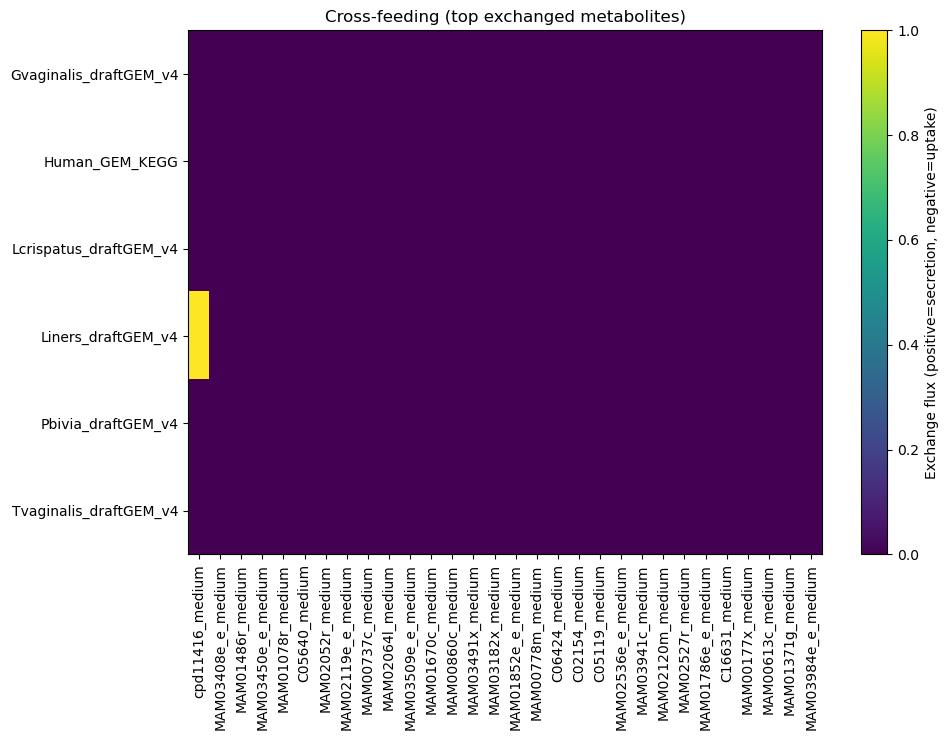

In [45]:
# --- Quick “who takes up / secretes” matrix plot (members x metabolites) ---
# Compute total absolute flux per metabolite to rank importance
abs_order = xw.abs().sum(axis=1).sort_values(ascending=False)

topN = 30  # show top-N metabolites
xw_top = xw.loc[abs_order.index[:topN]]  # slice top-N metabolites

plt.figure(figsize=(10, max(4, 0.25*topN)))  # scale height with number of metabolites
plt.imshow(xw_top.T, aspect="auto", interpolation="none")  # transpose: members on y-axis
plt.colorbar(label="Exchange flux (positive=secretion, negative=uptake)")
plt.yticks(ticks=range(len(xw_top.columns)), labels=xw_top.columns)  # member names
plt.xticks(ticks=range(len(xw_top.index)), labels=xw_top.index, rotation=90)  # metabolite IDs
plt.title("Cross-feeding (top exchanged metabolites)")
plt.tight_layout()
plt.show()

## Debugging lack of growth

The plots above look quite strange. They all seem to prioritize a single organism, rather than actual community interaction. 

In [46]:
# check for metabolite producers and consumers
print("Any producers? ", (xw > 0).any().any())
print("Any consumers? ", (xw < 0).any().any())

Any producers?  True
Any consumers?  False


I will test uptake by explicitly defining the media that the community is growing on. I will be using the widely-used defined media from Owen & Katz (1999): Owen, D. H., & Katz, D. F. (1999). A Vaginal Fluid Simulant. Contraception, 59, 91–95.

In [47]:
# Vaginal Fluid Simulant (Owen & Katz 1999) in KEGG IDs
vfs_kegg = {
    # Salts
    "Na+": "C01330",      # sodium ion
    "Cl-": "C00698",      # chloride ion
    "K+": "C00238",       # potassium ion
    "Ca2+": "C00076",     # calcium ion

    # Organic acids
    "L-lactate": "C00186",  # L-lactic acid
    "acetate": "C00033",    # acetic acid

    # Protein
    "albumin": None,         # not in KEGG; use placeholder or handle separately

    # Other solutes
    "glycerol": "C00116",   # glycerol
    "urea": "C00086",       # urea
    "D-glucose": "C00031"   # glucose
}

# Define concentrations (g/L) from Owen & Katz
vfs_conc = {
    "Na+": 3.51,
    "Cl-": 3.51,  # NaCl adjustment
    "K+": 1.40,
    "Ca2+": 0.222,
    "L-lactate": 2.00,
    "acetate": 1.00,
    "albumin": 0.018,  # handle separately
    "glycerol": 0.16,
    "urea": 0.4,
    "D-glucose": 5.0
}

In [48]:
# --- Find shared-medium exchange reactions in the community ---
# Select exchange reactions that are named like EX_*_medium
shared_ex = [rxn for rxn in com_model_obj.model.exchanges
             if rxn.id.startswith("EX_") and rxn.id.endswith("_medium")]

print(f"Shared-medium exchanges found: {len(shared_ex)} (first 10 IDs):")
print([rxn.id for rxn in shared_ex[:10]])

# Helper: extract KEGG ID from an EX_*_medium reaction ID
def kegg_from_ex_id(ex_id: str):
    # Match pattern like 'EX_C00422' and return 'C00422'
    m = re.search(r'EX_(C\d{5})', ex_id)
    return m.group(1) if m else None

# Build mapping: KEGG metabolite ID → shared EX reaction ID
kegg_to_shared_ex = {}
for rxn in shared_ex:
    kid = kegg_from_ex_id(rxn.id)
    if kid:
        kegg_to_shared_ex[kid] = rxn.id
        continue
    # Fallback: inspect the metabolite(s) inside the EX reaction
    for met in rxn.metabolites:
        m = re.search(r'(C\d{5})', met.id)
        if m:
            kegg_to_shared_ex.setdefault(m.group(1), rxn.id)

print("\nExample KEGG→shared EX mapping (first 10):")
print(list(kegg_to_shared_ex.items())[:10])

Shared-medium exchanges found: 9210 (first 10 IDs):
['EX_MAM02675x_medium', 'EX_MAM02553m_medium', 'EX_MAM03860e_e_medium', 'EX_MAM00563c_medium', 'EX_MAM00351c_medium', 'EX_MAM03271e_e_medium', 'EX_MAM00897m_medium', 'EX_MAM00341r_medium', 'EX_MAM00019e_e_medium', 'EX_C06426_medium']

Example KEGG→shared EX mapping (first 10):
[('C06426', 'EX_C06426_medium'), ('C04311', 'EX_C04311_medium'), ('C00992', 'EX_C00992_medium'), ('C16756', 'EX_C16756_medium'), ('C02075', 'EX_C02075_medium'), ('C20251', 'EX_C20251_medium'), ('C02477', 'EX_C02477_medium'), ('C05172', 'EX_C05172_medium'), ('C04520', 'EX_C04520_medium'), ('C11455', 'EX_C11455_medium')]


In [49]:
# Map VFS species KEGG IDs to shared-medium exchange reactions
mapped, missing = {}, []
for name, kid in vfs_kegg.items():
    if not kid:
        continue
    exid = kegg_to_shared_ex.get(kid)  # try to find shared EX reaction
    if exid:
        mapped[name] = (kid, exid)       # store mapping
    else:
        missing.append((name, kid))      # track unmapped species

print("\nVFS species mapped to SHARED medium exchanges:")
for name, (kid, exid) in mapped.items():
    print(f"  {name:12s} {kid}  ->  {exid}")

print("\nVFS species NOT present in shared medium (may exist only as member-local EX_*):")
print(pd.DataFrame(missing, columns=["name","KEGG"]))

# Diagnostic: show member-local exchange candidates for missing species
for name, kid in missing:
    candidates = [r.id for r in com_model_obj.model.reactions
                  if f"EX_{kid}" in r.id or (getattr(r, "name", "") == f"EX_{kid}")]
    if candidates:
        print(f"  {name} ({kid}) member-local candidates:", candidates[:6])


VFS species mapped to SHARED medium exchanges:
  Na+          C01330  ->  EX_C01330_medium
  Cl-          C00698  ->  EX_C00698_medium
  K+           C00238  ->  EX_C00238_medium
  Ca2+         C00076  ->  EX_C00076_medium
  L-lactate    C00186  ->  EX_C00186_medium
  acetate      C00033  ->  EX_C00033_medium
  glycerol     C00116  ->  EX_C00116_medium
  urea         C00086  ->  EX_C00086_medium
  D-glucose    C00031  ->  EX_C00031_medium

VFS species NOT present in shared medium (may exist only as member-local EX_*):
Empty DataFrame
Columns: [name, KEGG]
Index: []


In [50]:
# Build a medium dictionary mapping shared EX reaction IDs -> max influx
# Convert from g/L to mmol/L using approximate molecular weights (g/mmol)
mw = {
    "Na+": 0.023, "Cl-": 0.0355, "K+": 0.039, "Ca2+": 0.040,
    "L-lactate": 0.090, "acetate": 0.060,
    "glycerol": 0.092, "urea": 0.060, "D-glucose": 0.180
}

# Compute mmol/L for species with MW info
mmol_per_L = {name: (vfs_conc[name] / mw[name]) for name in mapped if name in mw}

# Scale flux bounds to "max influx" values
scale = 10.0
vfs_medium_scaled = {mapped[name][1]: mmol_per_L[name]*scale for name in mmol_per_L}

# Apply the medium
medium_to_apply = vfs_medium_scaled

print("\nApplying VFS medium to shared exchanges:")
for rid, val in medium_to_apply.items():
    print(f"  {rid}: max influx {val:.3f}")

com_model_obj.apply_medium(medium_to_apply)

# Verify medium assignment
try:
    print("\nMedium is set. Number of compounds in medium:", len(com_model_obj.medium))
except Exception as e:
    print("Medium check failed:", e)


Applying VFS medium to shared exchanges:
  EX_C01330_medium: max influx 1526.087
  EX_C00698_medium: max influx 988.732
  EX_C00238_medium: max influx 358.974
  EX_C00076_medium: max influx 55.500
  EX_C00186_medium: max influx 222.222
  EX_C00033_medium: max influx 166.667
  EX_C00116_medium: max influx 17.391
  EX_C00086_medium: max influx 66.667
  EX_C00031_medium: max influx 277.778

Medium is set. Number of compounds in medium: 9


In [51]:
# Quick checks on community medium status
print("medium_flag:", com_model_obj.medium_flag)
try:
    print("Medium size:", len(com_model_obj.medium))
except Exception:
    print("Medium not accessible (unexpected).")

# Run FBA and get cross-feeding table per member
# cross_feeding_metabolites_from_fba returns either just a table or (table, flux vector)
res = com_model_obj.cross_feeding_metabolites_from_fba(return_flux_vector=True)

# Handle both return formats
if isinstance(res, tuple) and len(res) == 2:
    cf_df, flux_vec = res
    print("Received cross-feeding dataframe and flux vector.")
else:
    cf_df = res
    flux_vec = None
    print("Received cross-feeding dataframe only.")

# Inspect the resulting dataframe
print("cross-feeding DF shape:", getattr(cf_df, "shape", None))
print("columns:", list(cf_df.columns)[:10])

medium_flag: True
Medium size: 9
Received cross-feeding dataframe and flux vector.
cross-feeding DF shape: (9211, 9)
columns: ['metabolite_id', 'metabolite_name', 'Gvaginalis_draftGEM_v4', 'Human_GEM_KEGG', 'Lcrispatus_draftGEM_v4', 'Liners_draftGEM_v4', 'Pbivia_draftGEM_v4', 'Tvaginalis_draftGEM_v4', 'cross_feeding']


In [52]:
# quick look at the CF DF you already have
print("cf_df columns:", cf_df.columns.tolist())
print("sample rows:")
display(cf_df.head(6))

cf_df columns: ['metabolite_id', 'metabolite_name', 'Gvaginalis_draftGEM_v4', 'Human_GEM_KEGG', 'Lcrispatus_draftGEM_v4', 'Liners_draftGEM_v4', 'Pbivia_draftGEM_v4', 'Tvaginalis_draftGEM_v4', 'cross_feeding']
sample rows:


,metabolite_id,metabolite_name,Gvaginalis_draftGEM_v4,Human_GEM_KEGG,Lcrispatus_draftGEM_v4,Liners_draftGEM_v4,Pbivia_draftGEM_v4,Tvaginalis_draftGEM_v4,cross_feeding
0,MAM02675x_medium,MAM02675x,0.0,0.0,0.0,0.0,0.0,0.0,False
1,MAM02553m_medium,MAM02553m,0.0,0.0,0.0,0.0,0.0,0.0,False
2,MAM03860e_e_medium,MAM03860e_e,0.0,0.0,0.0,0.0,0.0,0.0,False
3,MAM00563c_medium,MAM00563c,0.0,0.0,0.0,0.0,0.0,0.0,False
4,MAM00351c_medium,MAM00351c,0.0,0.0,0.0,0.0,0.0,0.0,False
5,MAM03271e_e_medium,MAM03271e_e,0.0,0.0,0.0,0.0,0.0,0.0,False


In [53]:
# Make a copy of the cross-feeding dataframe for processing
cf = cf_df.copy()

# Ensure there is a 'metabolite_name' column; if missing, create from index
if "metabolite_name" not in cf.columns:
    cf["metabolite_name"] = cf.index.astype(str)

# Extract KEGG ID (Cxxxxx) from metabolite_name
cf["kegg"] = cf["metabolite_name"].astype(str).str.extract(r'(C\d{5})', expand=False)

# Fallback: extract KEGG ID from metabolite_id or index if any are still missing
if cf["kegg"].isna().any():
    idx_series = cf["metabolite_id"].astype(str) if "metabolite_id" in cf.columns else cf.index.to_series().astype(str)
    cf["kegg"] = cf["kegg"].fillna(idx_series.str.extract(r'(C\d{5})', expand=False))

# Count how many rows successfully got a KEGG ID
n_kegg = cf["kegg"].notna().sum()
print(f"KEGG ids found in cross-feeding table: {n_kegg} / {len(cf)}")

# Show example rows with KEGG IDs
print("\nExamples (rows with KEGG):")
display(cf.loc[cf["kegg"].notna(), ["metabolite_id", "metabolite_name", "kegg"]].head(10))

KEGG ids found in cross-feeding table: 2269 / 9211

Examples (rows with KEGG):


,metabolite_id,metabolite_name,kegg
9,C06426_medium,C06426,C06426
24,C04311_medium,C04311,C04311
25,C00992_medium,C00992,C00992
27,C16756_medium,C16756,C16756
28,C02075_medium,C02075,C02075
32,C20251_medium,C20251,C20251
38,C02477_medium,C02477,C02477
40,C05172_medium,C05172,C05172
42,C04520_medium,C04520,C04520
45,C11455_medium,C11455,C11455


In [54]:
# Run FBA on the entire community model
sol = com_model_obj.model.optimize()

# Print the objective value of the community model (e.g., total biomass)
print("Community objective:", sol.objective_value)

# Count how many reactions have nonzero flux
print("Nonzero fluxes:", (sol.fluxes != 0).sum())

# Show the first 20 fluxes for inspection
print(sol.fluxes.head(20))

Community objective: 1.0
Nonzero fluxes: 2915
Gvaginalis_draftGEM_v4_R00006_Gvaginalis_draftGEM_v4_e          0.0
Gvaginalis_draftGEM_v4_R00014_Gvaginalis_draftGEM_v4_e          0.0
Gvaginalis_draftGEM_v4_R00104_Gvaginalis_draftGEM_v4_e          0.0
Gvaginalis_draftGEM_v4_R00127_Gvaginalis_draftGEM_v4_e          0.0
Gvaginalis_draftGEM_v4_R00130_Gvaginalis_draftGEM_v4_e          0.0
Gvaginalis_draftGEM_v4_R00132_Gvaginalis_draftGEM_v4_e          0.0
Gvaginalis_draftGEM_v4_R00137_Gvaginalis_draftGEM_v4_e          0.0
Gvaginalis_draftGEM_v4_R00158_Gvaginalis_draftGEM_v4_e          0.0
Gvaginalis_draftGEM_v4_R00161_Gvaginalis_draftGEM_v4_e          0.0
Gvaginalis_draftGEM_v4_R00177_Gvaginalis_draftGEM_v4_e          0.0
Gvaginalis_draftGEM_v4_R00188_Gvaginalis_draftGEM_v4_e          0.0
Gvaginalis_draftGEM_v4_R00190_Gvaginalis_draftGEM_v4_e          0.0
Gvaginalis_draftGEM_v4_R00192_Gvaginalis_draftGEM_v4_e          0.0
Gvaginalis_draftGEM_v4_R00194_EXP_1_Gvaginalis_draftGEM_v4_e    0.0
Gv

In [55]:
# Run FBA on the community model
sol = com_model_obj.model.optimize()

# Print overall community objective (e.g., total growth)
print("Objective:", sol.objective_value)

# Inspect specific exchange reactions for key metabolites (glucose, lactate, acetate, etc.)
for rid in ["EX_C00031_medium", "EX_C00186_medium", "EX_C00033_medium", "EX_C00116_medium", "EX_C00698_medium"]:
    if rid in com_model_obj.model.reactions:
        r = com_model_obj.model.reactions.get_by_id(rid)
        # Print the flux value for each exchange reaction
        print(r.id, "flux =", sol.fluxes[r.id])

Objective: 1.0
EX_C00031_medium flux = 0.0
EX_C00186_medium flux = 0.0
EX_C00033_medium flux = 0.0
EX_C00116_medium flux = 0.0
EX_C00698_medium flux = 0.0


In [56]:
# Collect all exchange reactions with nonzero flux
ex_fluxes = [
    (r.id, sol.fluxes[r.id]) 
    for r in com_model_obj.model.exchanges 
    if abs(sol.fluxes[r.id]) > 1e-9  # threshold to ignore numerical noise
]

# Print summary
print("Number of nonzero exchanges:", len(ex_fluxes))

# Show top 20 nonzero exchange fluxes for inspection
print("Top 20 nonzero exchange fluxes:")
for rid, val in ex_fluxes[:20]:
    print(rid, "=", val)

Number of nonzero exchanges: 1
Top 20 nonzero exchange fluxes:
f_final = 1.0


In [57]:
def apply_kegg_medium_to_shared(com_model_obj, kegg_medium, concentrations_gL, mw_g_mmol=None, scale=10.0, uniform_cap=None):
    """
    Apply a KEGG-based medium (compound_name -> KEGG ID) to a PyCoMo community model
    by mapping to shared-medium exchange reactions (EX_*_medium).

    Parameters
    ----------
    com_model_obj : PyCoMo Community object
        Community model object.
    kegg_medium : dict
        compound_name -> KEGG ID mapping.
    concentrations_gL : dict
        compound_name -> concentration in g/L.
    mw_g_mmol : dict, optional
        Molecular weight for compounds in g/mmol (used for g/L -> mmol/L conversion).
    scale : float, optional
        Multiplier to convert mmol/L to max influx (default 10.0).
    uniform_cap : float, optional
        If provided, sets all exchange reactions to this value instead of scaling.

    Returns
    -------
    medium_to_apply : dict
        reaction_id -> max influx applied.
    missing : list
        List of (compound_name, KEGG ID) not found in shared-medium exchanges.
    """
    # --- 1) Find shared-medium exchange reactions ---
    shared_ex = [rxn for rxn in com_model_obj.model.exchanges 
                 if rxn.id.startswith("EX_") and rxn.id.endswith("_medium")]
    
    # Helper: extract KEGG ID from EX_*_medium ID
    def kegg_from_ex_id(ex_id):
        m = re.search(r'EX_(C\d{5})', ex_id)
        return m.group(1) if m else None
    
    # Build KEGG ID -> shared EX ID mapping
    kegg_to_shared_ex = {}
    for rxn in shared_ex:
        kid = kegg_from_ex_id(rxn.id)
        if kid:
            kegg_to_shared_ex[kid] = rxn.id
            continue
        # fallback: inspect metabolites inside the reaction
        for met in rxn.metabolites:
            m = re.search(r'(C\d{5})', met.id)
            if m:
                kegg_to_shared_ex.setdefault(m.group(1), rxn.id)
    
    # --- 2) Map KEGG medium to reaction IDs ---
    mapped, missing = {}, []
    for name, kid in kegg_medium.items():
        if not kid:
            continue
        exid = kegg_to_shared_ex.get(kid)
        if exid:
            mapped[name] = (kid, exid)
        else:
            missing.append((name, kid))
    
    # --- 3) Build medium dict ---
    if uniform_cap is not None:
        # all exchanges get the same cap
        medium_to_apply = {exid: uniform_cap for _, (_, exid) in mapped.items()}
    else:
        medium_to_apply = {}
        for name, (kid, exid) in mapped.items():
            if mw_g_mmol and name in mw_g_mmol:
                # convert g/L -> mmol/L, then scale
                mmolL = concentrations_gL[name] / mw_g_mmol[name]
                medium_to_apply[exid] = mmolL * scale
            else:
                # fallback if MW unknown: scale g/L directly
                medium_to_apply[exid] = concentrations_gL[name] * scale
    
    # --- 4) Apply the medium to the community model ---
    com_model_obj.apply_medium(medium_to_apply)
    
    # --- 5) Report results ---
    print(f"Applied medium to {len(medium_to_apply)} shared-medium reactions.")
    if missing:
        print(f"Warning: {len(missing)} compounds not found as shared-medium EX:")
        for name, kid in missing:
            print(f"  {name}: {kid}")
    
    return medium_to_apply, missing


# Example molecular weights in g/mmol
mw = {
    "Na+": 0.023, "Cl-": 0.0355, "K+": 0.039, "Ca2+": 0.040,
    "L-lactate": 0.090, "acetate": 0.060,
    "glycerol": 0.092, "urea": 0.060, "D-glucose": 0.180
}

# Apply the VFS medium to shared-medium exchanges
applied_medium, missing = apply_kegg_medium_to_shared(
    com_model_obj,
    kegg_medium=vfs_kegg,
    concentrations_gL=vfs_conc,
    mw_g_mmol=mw,
    scale=10.0
)

# Show examples of applied flux caps
print("\nExample applied medium (first 10 reactions):")
for rid, val in list(applied_medium.items())[:10]:
    print(f"{rid}: {val:.3f}")

Applied medium to 9 shared-medium reactions.

Example applied medium (first 10 reactions):
EX_C01330_medium: 1526.087
EX_C00698_medium: 988.732
EX_C00238_medium: 358.974
EX_C00076_medium: 55.500
EX_C00186_medium: 222.222
EX_C00033_medium: 166.667
EX_C00116_medium: 17.391
EX_C00086_medium: 66.667
EX_C00031_medium: 277.778


In [58]:
# Run cross-feeding FBA and get a table of metabolite fluxes per member
cf_df = com_model_obj.cross_feeding_metabolites_from_fba(return_flux_vector=False)

# Extract KEGG IDs from metabolite names (e.g., "C00031"); ignores non-KEGG entries like Human/MAM compounds
cf_df["kegg"] = cf_df["metabolite_name"].astype(str).str.extract(r'(C\d{5})', expand=False)

# Keep only rows with valid KEGG IDs
cf_df_kegg = cf_df[cf_df["kegg"].notna()]

# Show how many KEGG metabolites were found in the cross-feeding table
print("KEGG metabolites in cross-feeding table:", cf_df_kegg.shape[0])

KEGG metabolites in cross-feeding table: 2269


In [59]:
# Identify columns corresponding to community members (exclude metadata columns)
member_cols = [c for c in cf_df_kegg.columns if c not in ("metabolite_id","metabolite_name","cross_feeding","kegg")]

# Pivot the KEGG cross-feeding table into a wide matrix: rows = KEGG IDs, columns = members, values = flux
xw_kegg = cf_df_kegg.pivot_table(index="kegg", values=member_cols, aggfunc="first").fillna(0.0)

# Show the resulting matrix dimensions
print("Wide cross-feeding matrix shape:", xw_kegg.shape)

Wide cross-feeding matrix shape: (2258, 6)


In [60]:
# Count number of positive flux entries (metabolites secreted by any member)
num_producers = (xw_kegg > 0).sum().sum()

# Count number of negative flux entries (metabolites taken up by any member)
num_consumers = (xw_kegg < 0).sum().sum()

# Print totals
print("Total producer entries (>0):", num_producers)
print("Total consumer entries (<0):", num_consumers)

Total producer entries (>0): 0
Total consumer entries (<0): 0


In [61]:
# Optimize the community model to get fluxes
sol = com_model_obj.model.optimize()

# Collect exchange fluxes for reactions corresponding to KEGG metabolites
ex_fluxes = []
for r in com_model_obj.model.exchanges:
    # crude filter: KEGG IDs typically contain "C"
    if "C" in r.id:
        flux = sol.fluxes[r.id]
        # keep only non-negligible fluxes
        if abs(flux) > 1e-9:
            ex_fluxes.append((r.id, flux))

# Summary
print("Nonzero KEGG-style exchange fluxes:", len(ex_fluxes))
print("Example:")
for rid, val in ex_fluxes[:20]:
    print(rid, "=", val)

Nonzero KEGG-style exchange fluxes: 0
Example:


In [62]:
# For selected KEGG metabolites, list all reactions in the community model containing them
for mid in ["C00031", "C00186", "C00033", "C00116", "C00698"]:
    # find reaction IDs that include the KEGG ID as a substring
    rxns = [r.id for r in com_model_obj.model.reactions if mid in r.id]
    # print the first few matches for inspection
    print(mid, "→", rxns[:10])

C00031 → ['Gvaginalis_draftGEM_v4_EX_C00031', 'SK_Gvaginalis_draftGEM_v4_EX_C00031_lb', 'SK_Gvaginalis_draftGEM_v4_EX_C00031_ub', 'Human_GEM_KEGG_EX_C00031', 'EX_C00031_medium', 'Lcrispatus_draftGEM_v4_EX_C00031', 'SK_Lcrispatus_draftGEM_v4_EX_C00031_lb', 'SK_Lcrispatus_draftGEM_v4_EX_C00031_ub', 'Liners_draftGEM_v4_EX_C00031', 'SK_Liners_draftGEM_v4_EX_C00031_lb']
C00186 → ['Gvaginalis_draftGEM_v4_EX_C00186', 'SK_Gvaginalis_draftGEM_v4_EX_C00186_lb', 'SK_Gvaginalis_draftGEM_v4_EX_C00186_ub', 'Human_GEM_KEGG_EX_C00186', 'EX_C00186_medium', 'Lcrispatus_draftGEM_v4_EX_C00186', 'SK_Lcrispatus_draftGEM_v4_EX_C00186_lb', 'SK_Lcrispatus_draftGEM_v4_EX_C00186_ub', 'Liners_draftGEM_v4_EX_C00186', 'SK_Liners_draftGEM_v4_EX_C00186_lb']
C00033 → ['Gvaginalis_draftGEM_v4_EX_C00033', 'SK_Gvaginalis_draftGEM_v4_EX_C00033_lb', 'SK_Gvaginalis_draftGEM_v4_EX_C00033_ub', 'Human_GEM_KEGG_EX_C00033', 'EX_C00033_medium', 'Lcrispatus_draftGEM_v4_EX_C00033', 'SK_Lcrispatus_draftGEM_v4_EX_C00033_lb', 'SK_Lcri

In [63]:
# Select the first community member
member_name = com_model_obj.get_member_names()[0]
print("First member:", member_name)

# Collect all reactions whose IDs start with this member's name
member_rxns = [r for r in com_model_obj.model.reactions if r.id.startswith(member_name)]
print(f"{member_name} has {len(member_rxns)} reactions")

# Filter only exchange reactions for this member (IDs like "<member>_EX_*")
member_ex_rxns = [r for r in member_rxns if r.id.startswith(f"{member_name}_EX_")]
print(f"{member_name} has {len(member_ex_rxns)} exchange reactions")

# Optimize the community model
sol = com_model_obj.model.optimize()

# Print fluxes for the first 20 member-specific exchange reactions
for r in member_ex_rxns[:20]:
    print(r.id, sol.fluxes[r.id])

First member: Gvaginalis_draftGEM_v4
Gvaginalis_draftGEM_v4 has 10180 reactions
Gvaginalis_draftGEM_v4 has 9473 exchange reactions
Gvaginalis_draftGEM_v4_EX_C00001 0.0
Gvaginalis_draftGEM_v4_EX_C00002 0.0
Gvaginalis_draftGEM_v4_EX_C00003 0.0
Gvaginalis_draftGEM_v4_EX_C00004 0.0
Gvaginalis_draftGEM_v4_EX_C00005 0.0
Gvaginalis_draftGEM_v4_EX_C00006 0.0
Gvaginalis_draftGEM_v4_EX_C00007 0.0
Gvaginalis_draftGEM_v4_EX_C00008 0.0
Gvaginalis_draftGEM_v4_EX_C00009 0.0
Gvaginalis_draftGEM_v4_EX_C00010 0.0
Gvaginalis_draftGEM_v4_EX_C00013 0.0
Gvaginalis_draftGEM_v4_EX_C00014 0.0
Gvaginalis_draftGEM_v4_EX_C00019 0.0
Gvaginalis_draftGEM_v4_EX_C00020 0.0
Gvaginalis_draftGEM_v4_EX_C00022 0.0
Gvaginalis_draftGEM_v4_EX_C00024 0.0
Gvaginalis_draftGEM_v4_EX_C00025 0.0
Gvaginalis_draftGEM_v4_EX_C00026 0.0
Gvaginalis_draftGEM_v4_EX_C00030 0.0
Gvaginalis_draftGEM_v4_EX_C00031 0.0


In [64]:
# Specify the member of interest
member_name = "Gvaginalis_draftGEM_v4"

# Check bounds of key exchange reactions for this member
for mid in ["C00031", "C00186", "C00033", "C00116", "C00698"]:
    rxn_id = f"{member_name}_EX_{mid}"  # build member-specific exchange reaction ID
    if rxn_id in com_model_obj.model.reactions:
        rxn = com_model_obj.model.reactions.get_by_id(rxn_id)
        print(rxn_id, "bounds:", rxn.bounds)  # print (lower_bound, upper_bound)

Gvaginalis_draftGEM_v4_EX_C00031 bounds: (-1000.0, 1000.0)
Gvaginalis_draftGEM_v4_EX_C00186 bounds: (-1000.0, 1000.0)
Gvaginalis_draftGEM_v4_EX_C00033 bounds: (-1000.0, 1000.0)
Gvaginalis_draftGEM_v4_EX_C00116 bounds: (-1000.0, 1000.0)
Gvaginalis_draftGEM_v4_EX_C00698 bounds: (-1000, 1000)


In [65]:
def extract_member_model(com_model_obj, member_name):
    """
    Extract a single-member COBRA model from a PyCoMo community model.

    Parameters
    ----------
    com_model_obj : PyCoMo community object
        The full community model.
    member_name : str
        Name of the member to extract.

    Returns
    -------
    member_model : cobra.Model
        COBRA model containing only reactions for this member.
    """
    # Copy reactions belonging to the member
    member_rxns = [r.copy() for r in com_model_obj.model.reactions if r.id.startswith(member_name)]
    
    # Create a new COBRA model for this member
    member_model = Model(member_name)
    
    # Add copied reactions
    member_model.add_reactions(member_rxns)
    
    return member_model

# Extract G. vaginalis model and run FBA
gv_model = extract_member_model(com_model_obj, "Gvaginalis_draftGEM_v4")
sol_gv = gv_model.optimize()
print("Objective (Gvaginalis only):", sol_gv.objective_value)

# Check glucose exchange flux for this member
rxn_id = "Gvaginalis_draftGEM_v4_EX_C00031"
if rxn_id in gv_model.reactions:
    print("Glucose exchange flux:", sol_gv.fluxes[rxn_id])

Objective (Gvaginalis only): 0.0
Glucose exchange flux: 0.0


In [66]:
print("Objective reactions:", gv_model.objective.expression)

Objective reactions: 0


In [67]:
# Identify biomass reactions in the extracted Gvaginalis model
biomass_rxns = [r for r in gv_model.reactions if "biomass" in r.id.lower()]

# Display found biomass reactions
print("Biomass reactions:", biomass_rxns)

# If any biomass reaction exists, report its ID and flux
if biomass_rxns:
    bm_rxn = biomass_rxns[0]  # pick the first one
    print("Biomass reaction:", bm_rxn.id)
    print("Flux in solution:", sol_gv.fluxes.get(bm_rxn.id, None))

Biomass reactions: [<Reaction Gvaginalis_draftGEM_v4_to_community_biomass at 0x7d52b43209f0>]
Biomass reaction: Gvaginalis_draftGEM_v4_to_community_biomass
Flux in solution: 0.0


In [68]:
# Get the glucose exchange reaction in the Gvaginalis model
glc_rxn = gv_model.reactions.get_by_id("Gvaginalis_draftGEM_v4_EX_C00031")

# List metabolites participating in this exchange reaction
print("Glucose exchange metabolites:", [m.id for m in glc_rxn.metabolites])

# Inspect connected reactions for each metabolite (potential transporters)
for m in glc_rxn.metabolites:
    connected_rxns = [r.id for r in m.reactions if r.id != glc_rxn.id]
    print("Metabolite", m.id, "is connected to", connected_rxns[:10])

Glucose exchange metabolites: ['Gvaginalis_draftGEM_v4_EX_C00031_lb', 'Gvaginalis_draftGEM_v4_EX_C00031_ub', 'Gvaginalis_draftGEM_v4_C00031_Gvaginalis_draftGEM_v4_e']
Metabolite Gvaginalis_draftGEM_v4_EX_C00031_lb is connected to ['Gvaginalis_draftGEM_v4_fraction_reaction']
Metabolite Gvaginalis_draftGEM_v4_EX_C00031_ub is connected to ['Gvaginalis_draftGEM_v4_fraction_reaction']
Metabolite Gvaginalis_draftGEM_v4_C00031_Gvaginalis_draftGEM_v4_e is connected to ['Gvaginalis_draftGEM_v4_R00801_Gvaginalis_draftGEM_v4_e', 'Gvaginalis_draftGEM_v4_R01555_Gvaginalis_draftGEM_v4_e', 'Gvaginalis_draftGEM_v4_R06114_Gvaginalis_draftGEM_v4_e', 'Gvaginalis_draftGEM_v4_R00837_Gvaginalis_draftGEM_v4_e', 'Gvaginalis_draftGEM_v4_R00299_Gvaginalis_draftGEM_v4_e', 'Gvaginalis_draftGEM_v4_R02727_Gvaginalis_draftGEM_v4_e', 'Gvaginalis_draftGEM_v4_R01718_Gvaginalis_draftGEM_v4_e', 'Gvaginalis_draftGEM_v4_R06113_Gvaginalis_draftGEM_v4_e']


In [72]:
# Set the pseudo-biomass reaction as the model objective
bm_rxn = gv_model.reactions.get_by_id("Gvaginalis_draftGEM_v4_to_community_biomass")
gv_model.objective = bm_rxn

# Re-run FBA with biomass as the objective
sol_gv = gv_model.optimize()
print("Objective (Gvaginalis biomass):", sol_gv.objective_value)

# Check glucose uptake/secretion flux
if "Gvaginalis_draftGEM_v4_EX_C00031" in gv_model.reactions:
    print("Glucose exchange flux:", sol_gv.fluxes["Gvaginalis_draftGEM_v4_EX_C00031"])

Objective (Gvaginalis biomass): 0.0
Glucose exchange flux: 0.0


In [73]:
def biomass_gap_check(model, biomass_rxn_id):
    """
    Check which biomass precursors are producible in the given model.
    
    Adds temporary demand reactions (DM_*) for each metabolite consumed in biomass,
    optimizes for production, and reports which metabolites cannot be produced.
    
    Parameters
    ----------
    model : cobra.Model
        The metabolic model to test.
    biomass_rxn_id : str
        ID of the biomass reaction.
    
    Returns
    -------
    missing : list of str
        List of metabolite IDs that are required for biomass but cannot be produced.
    """
    rxn = model.reactions.get_by_id(biomass_rxn_id)
    print(f"Checking biomass precursors for {rxn.id}...")
    
    missing = []
    for met, coeff in rxn.metabolites.items():
        if coeff < 0:  # metabolite consumed in biomass
            demand_id = f"DM_{met.id}"
            if demand_id not in model.reactions:
                # create a temporary demand reaction for the metabolite
                demand_rxn = cobra.Reaction(demand_id)
                demand_rxn.name = f"Demand {met.id}"
                demand_rxn.add_metabolites({met: -1})
                model.add_reactions([demand_rxn])
            else:
                demand_rxn = model.reactions.get_by_id(demand_id)

            # optimize to see if metabolite can be produced
            model.objective = demand_rxn
            sol = model.optimize()
            if sol.objective_value < 1e-9:
                missing.append(met.id)
    
    print(f"\nTotal precursors required: {len([m for m,c in rxn.metabolites.items() if c<0])}")
    print(f"Missing / blocked precursors: {len(missing)}")
    return missing

In [74]:
# Run the biomass gap check for G. vaginalis pseudo-biomass
missing_precursors = biomass_gap_check(
    gv_model,
    "Gvaginalis_draftGEM_v4_to_community_biomass"
)

# Display the first 20 missing precursors
print("Missing precursors:")
for m in missing_precursors[:20]:
    print(" -", m)

Checking biomass precursors for Gvaginalis_draftGEM_v4_to_community_biomass...

Total precursors required: 3
Missing / blocked precursors: 3
Missing precursors:
 - Gvaginalis_draftGEM_v4_f_biomass_met
 - Gvaginalis_draftGEM_v4_to_community_biomass_ub
 - Gvaginalis_draftGEM_v4_cpd11416_Gvaginalis_draftGEM_v4_medium


In [75]:
# Inspect all original COBRA models loaded from SBML
for name, m in named_models.items():
    # Identify reactions that are likely biomass reactions
    biomass_rxns = [r for r in m.reactions
                    if "biomass" in r.id.lower() or "biomass" in (r.name or "").lower()]
    
    print(f"\nModel: {name}  -- total reactions: {len(m.reactions)}  metabolites: {len(m.metabolites)}")
    print("  biomass candidates:", [r.id for r in biomass_rxns][:10])
    
    # Show more details for each candidate
    for r in biomass_rxns:
        print("   ", r.id, "-> stoichiometry size:", len(r.metabolites))


Model: Gvaginalis_draftGEM_v4  -- total reactions: 984  metabolites: 979
  biomass candidates: ['BIOMASS_ps']
    BIOMASS_ps -> stoichiometry size: 273

Model: Human-GEM_KEGG  -- total reactions: 12971  metabolites: 8455
  biomass candidates: ['MAR04413', 'MAR09931', 'MAR09932', 'MAR12140', 'MAR10024', 'MAR10062', 'MAR10063', 'MAR10064', 'MAR10065', 'MAR13082']
    MAR04413 -> stoichiometry size: 42
    MAR09931 -> stoichiometry size: 38
    MAR09932 -> stoichiometry size: 15
    MAR12140 -> stoichiometry size: 38
    MAR10024 -> stoichiometry size: 1
    MAR10062 -> stoichiometry size: 41
    MAR10063 -> stoichiometry size: 10
    MAR10064 -> stoichiometry size: 60
    MAR10065 -> stoichiometry size: 39
    MAR13082 -> stoichiometry size: 13

Model: Lcrispatus_draftGEM_v4  -- total reactions: 1019  metabolites: 1010
  biomass candidates: ['BIOMASS_ps']
    BIOMASS_ps -> stoichiometry size: 263

Model: Liners_draftGEM_v4  -- total reactions: 781  metabolites: 825
  biomass candidates:

In [76]:
# Inspect SingleOrganismModel wrappers around COBRA models
for som in single_org_models:
    print(f"\nSingleOrganismModel: {som.name}")
    m = som.model
    print("  wrapped cobra model has reactions:", len(m.reactions), "metabolites:", len(m.metabolites))
    
    # Identify biomass-like reactions in the wrapped model
    biomass_rxns = [r for r in m.reactions
                    if "biomass" in r.id.lower() or "biomass" in (r.name or "").lower()]
    print("  biomass candidates in wrapped model:", [r.id for r in biomass_rxns][:10])
    for r in biomass_rxns:
        print("    ", r.id, "stoich size:", len(r.metabolites))
    
    # Show any fraction reactions added by PyCoMo
    f_reacts = [r for r in m.reactions if "fraction_reaction" in r.id or r.id.endswith("_fraction_reaction")]
    print("  fraction reactions found (example up to 5):", [r.id for r in f_reacts][:5])
    
    # Inspect dummy metabolites related to fraction reactions
    f_mets = [met for met in m.metabolites if met.id.endswith("_lb") or met.id.endswith("_ub") or "fraction" in met.id]
    print("  dummy f metabolites (sample up to 5):", [met.id for met in f_mets][:5])


SingleOrganismModel: Gvaginalis_draftGEM_v4
  wrapped cobra model has reactions: 10179 metabolites: 9473
  biomass candidates in wrapped model: ['BIOMASS_ps']
     BIOMASS_ps stoich size: 273
  fraction reactions found (example up to 5): []
  dummy f metabolites (sample up to 5): []

SingleOrganismModel: Human_GEM_KEGG
  wrapped cobra model has reactions: 22444 metabolites: 9473
  biomass candidates in wrapped model: ['MAR04413', 'MAR09931', 'MAR09932', 'MAR12140', 'MAR10024', 'MAR10062', 'MAR10063', 'MAR10064', 'MAR10065', 'MAR13082']
     MAR04413 stoich size: 42
     MAR09931 stoich size: 38
     MAR09932 stoich size: 15
     MAR12140 stoich size: 38
     MAR10024 stoich size: 1
     MAR10062 stoich size: 41
     MAR10063 stoich size: 10
     MAR10064 stoich size: 60
     MAR10065 stoich size: 39
     MAR13082 stoich size: 13
  fraction reactions found (example up to 5): []
  dummy f metabolites (sample up to 5): []

SingleOrganismModel: Lcrispatus_draftGEM_v4
  wrapped cobra model

In [77]:
# Inspect SingleOrganismModel objects stored as members of the community
print("CommunityModel has", len(com_model_obj.member_models), "member SingleOrganismModel entries")

for som in com_model_obj.member_models:
    print("\nMember:", som.name)
    m = som.model
    
    # Identify biomass-like reactions for this member
    biomass_rxns = [r for r in m.reactions
                    if "biomass" in r.id.lower() or "biomass" in (r.name or "").lower()]
    print("  biomass candidates:", [r.id for r in biomass_rxns][:10])
    for r in biomass_rxns:
        print("    ", r.id, "stoich size:", len(r.metabolites))
    
    # Inspect fraction/dummy metabolites added by PyCoMo for this member
    f_mets = [met.id for met in m.metabolites
              if met.id.endswith("_lb") or met.id.endswith("_ub") or "fraction" in met.id]
    print("  sample dummy mets:", f_mets[:8])

CommunityModel has 6 member SingleOrganismModel entries

Member: Gvaginalis_draftGEM_v4
  biomass candidates: ['BIOMASS_ps']
     BIOMASS_ps stoich size: 273
  sample dummy mets: []

Member: Human_GEM_KEGG
  biomass candidates: ['MAR04413', 'MAR09931', 'MAR09932', 'MAR12140', 'MAR10024', 'MAR10062', 'MAR10063', 'MAR10064', 'MAR10065', 'MAR13082']
     MAR04413 stoich size: 42
     MAR09931 stoich size: 38
     MAR09932 stoich size: 15
     MAR12140 stoich size: 38
     MAR10024 stoich size: 1
     MAR10062 stoich size: 41
     MAR10063 stoich size: 10
     MAR10064 stoich size: 60
     MAR10065 stoich size: 39
     MAR13082 stoich size: 13
  sample dummy mets: []

Member: Lcrispatus_draftGEM_v4
  biomass candidates: ['BIOMASS_ps']
     BIOMASS_ps stoich size: 263
  sample dummy mets: []

Member: Liners_draftGEM_v4
  biomass candidates: ['BIOMASS_ps']
     BIOMASS_ps stoich size: 202
  sample dummy mets: []

Member: Pbivia_draftGEM_v4
  biomass candidates: ['BIOMASS_ps']
     BIOMASS_ps

In [78]:
# Inspect reactions in the community model that resemble community biomass
community_biomass = [
    r for r in com_model_obj.model.reactions
    if "community" in r.id.lower() 
       or "to_community_biomass" in r.id.lower() 
       or "community_biomass" in (r.id.lower() + (r.name or "").lower())
]

# Show first 20 candidate reactions
print("Community-level biomass-like:", [r.id for r in community_biomass][:20])

# Inspect stoichiometry size for each candidate
for r in community_biomass:
    print("  ", r.id, "stoich size:", len(r.metabolites))

Community-level biomass-like: ['Gvaginalis_draftGEM_v4_to_community_biomass', 'SK_Gvaginalis_draftGEM_v4_to_community_biomass_ub', 'Human_GEM_KEGG_to_community_biomass', 'SK_Human_GEM_KEGG_to_community_biomass_ub', 'Lcrispatus_draftGEM_v4_to_community_biomass', 'SK_Lcrispatus_draftGEM_v4_to_community_biomass_ub', 'Liners_draftGEM_v4_to_community_biomass', 'SK_Liners_draftGEM_v4_to_community_biomass_ub', 'Pbivia_draftGEM_v4_to_community_biomass', 'SK_Pbivia_draftGEM_v4_to_community_biomass_ub', 'Tvaginalis_draftGEM_v4_to_community_biomass', 'SK_Tvaginalis_draftGEM_v4_to_community_biomass_ub', 'community_biomass']
   Gvaginalis_draftGEM_v4_to_community_biomass stoich size: 4
   SK_Gvaginalis_draftGEM_v4_to_community_biomass_ub stoich size: 1
   Human_GEM_KEGG_to_community_biomass stoich size: 4
   SK_Human_GEM_KEGG_to_community_biomass_ub stoich size: 1
   Lcrispatus_draftGEM_v4_to_community_biomass stoich size: 4
   SK_Lcrispatus_draftGEM_v4_to_community_biomass_ub stoich size: 1
   Lin

In [79]:
# Identify all dummy metabolites used for upper/lower bounds in the community model
ub_lb_mets = [
    met for met in com_model_obj.model.metabolites 
    if met.id.endswith("_ub") or met.id.endswith("_lb")
]
print("Number of _ub/_lb dummy metabolites in community model:", len(ub_lb_mets))
print("Example _ub/_lb (first 10):", [m.id for m in ub_lb_mets[:10]])

# Inspect the reactions that produce or consume a specific problematic "_ub" metabolite
probe = "Gvaginalis_draftGEM_v4_BIOMASS_ps_Gvaginalis_draftGEM_v4_e_ub"
if probe in [m.id for m in com_model_obj.model.metabolites]:
    met = com_model_obj.model.metabolites.get_by_id(probe)
    print("Reactions producing/consuming this ub:", [
        (r.id, getattr(r, "reaction", r.id)) for r in met.reactions
    ][:20])
else:
    print(probe, "not found in community model metabolites.")

Number of _ub/_lb dummy metabolites in community model: 45351
Example _ub/_lb (first 10): ['Gvaginalis_draftGEM_v4_R00006_Gvaginalis_draftGEM_v4_e_lb', 'Gvaginalis_draftGEM_v4_R00006_Gvaginalis_draftGEM_v4_e_ub', 'Gvaginalis_draftGEM_v4_R00014_Gvaginalis_draftGEM_v4_e_ub', 'Gvaginalis_draftGEM_v4_R00104_Gvaginalis_draftGEM_v4_e_lb', 'Gvaginalis_draftGEM_v4_R00104_Gvaginalis_draftGEM_v4_e_ub', 'Gvaginalis_draftGEM_v4_R00127_Gvaginalis_draftGEM_v4_e_lb', 'Gvaginalis_draftGEM_v4_R00127_Gvaginalis_draftGEM_v4_e_ub', 'Gvaginalis_draftGEM_v4_R00130_Gvaginalis_draftGEM_v4_e_lb', 'Gvaginalis_draftGEM_v4_R00130_Gvaginalis_draftGEM_v4_e_ub', 'Gvaginalis_draftGEM_v4_R00132_Gvaginalis_draftGEM_v4_e_lb']
Gvaginalis_draftGEM_v4_BIOMASS_ps_Gvaginalis_draftGEM_v4_e_ub not found in community model metabolites.


In [80]:
# rename keys for consistency
if 'Human-GEM_KEGG' in named_models:
    named_models['Human_GEM_KEGG'] = named_models.pop('Human-GEM_KEGG')

In [81]:
# Step 1: Remove any pseudo community biomass reactions
pseudo_bm_rxns = [r for r in com_model_obj.model.reactions if "to_community_biomass" in r.id.lower()]
if pseudo_bm_rxns:
    com_model_obj.model.remove_reactions(pseudo_bm_rxns)
    print(f"Removed {len(pseudo_bm_rxns)} pseudo community biomass reactions")

# Step 2: Restore original biomass reactions for each member
for member_som in com_model_obj.member_models:
    member_name = member_som.name
    print(f"\nProcessing member: {member_name}")
    
    m = member_som.model  # the SingleOrganismModel's wrapped cobra model

    # Check if biomass already exists in this member
    biomass_rxns = [r for r in m.reactions if "biomass" in r.id.lower() or (r.name and "biomass" in r.name.lower())]
    if biomass_rxns:
        print(f"  Ignoring reaction '{biomass_rxns[0].id}' since it already exists")
        continue

    # Get the original SBML model
    orig_model = named_models.get(member_name)
    if orig_model is None:
        print(f"  WARNING: Original SBML model for {member_name} not found, skipping")
        continue

    # Attempt to find biomass by reaction ID/name
    orig_bm_candidates = [
        r for r in orig_model.reactions
        if "biomass" in r.id.lower() or (r.name and "biomass" in r.name.lower())
    ]

    if orig_bm_candidates:
        orig_bm = orig_bm_candidates[0]
    else:
        # Fallback: use the first reaction in the objective
        obj_expr = orig_model.objective.expression
        if hasattr(obj_expr, "variables") and obj_expr.variables:
            first_rxn_id = list(obj_expr.variables.keys())[0]
            orig_bm = orig_model.reactions.get_by_id(first_rxn_id)
            print(f"  Using objective reaction '{orig_bm.id}' as biomass")
        else:
            print(f"  WARNING: No biomass found for {member_name}, skipping")
            continue

    # Ensure all metabolites exist in the member submodel
    missing_mets = [met for met in orig_bm.metabolites if met.id not in m.metabolites]
    if missing_mets:
        for met in missing_mets:
            m.add_metabolites([met.copy()])
        print(f"  Added {len(missing_mets)} missing metabolites for biomass reaction")

    # Add the biomass reaction
    m.add_reactions([orig_bm.copy()])
    print(f"  Added original biomass reaction: {orig_bm.id} (stoichiometry size: {len(orig_bm.metabolites)})")

Removed 12 pseudo community biomass reactions

Processing member: Gvaginalis_draftGEM_v4
  Ignoring reaction 'BIOMASS_ps' since it already exists

Processing member: Human_GEM_KEGG
  Ignoring reaction 'MAR04413' since it already exists

Processing member: Lcrispatus_draftGEM_v4
  Ignoring reaction 'BIOMASS_ps' since it already exists

Processing member: Liners_draftGEM_v4
  Ignoring reaction 'BIOMASS_ps' since it already exists

Processing member: Pbivia_draftGEM_v4
  Ignoring reaction 'BIOMASS_ps' since it already exists

Processing member: Tvaginalis_draftGEM_v4
  Ignoring reaction 'BIOMASS_ps' since it already exists


In [82]:
# Re-optimize the full community model
sol_com = com_model_obj.model.optimize()
print("Community objective (total biomass):", sol_com.objective_value)

# Look at member-local exchange fluxes again
member_local_ex = [
    (r.id, sol_com.fluxes[r.id])
    for r in com_model_obj.model.exchanges
    if any(r.id.endswith(f"_{m}_e") for m in com_model_obj.get_member_names())
]
# Count nonzero fluxes
print("Number of nonzero member-local exchanges:", sum(1 for _, f in member_local_ex if abs(f) > 1e-9))

# Optional: check specific key metabolites
key_mids = ["C00031", "C00186", "C00033", "C00116", "C00698"]
for mid in key_mids:
    # Find all reactions involving this KEGG metabolite
    rxns = [r.id for r in com_model_obj.model.reactions if mid in r.id]
    for rid in rxns:
        flux = sol_com.fluxes.get(rid, 0.0)
        if abs(flux) > 1e-9:
            print(rid, "flux:", flux)

Community objective (total biomass): 1.0
Number of nonzero member-local exchanges: 0


In [83]:
com_model_obj.model.optimize()

<Solution infeasible at 0x7d52b1db0c90>

It's possible that the medium is too permissive, so there isn't cross-feeding because there doesn't need to be. 

In [84]:
for mid in ["C00031", "C00186", "C00033", "C00116", "C00698"]:
    # Access the shared-medium exchange reaction for this KEGG compound
    rxn = com_model_obj.model.reactions.get_by_id(f"EX_{mid}_medium")
    
    # Restrict uptake/secretion by setting bounds to zero
    rxn.lower_bound = 0.0  # no uptake allowed
    rxn.upper_bound = 0.0  # no secretion allowed (fully blocked)

In [85]:
sol_com = com_model_obj.model.optimize()
print("Community objective (total biomass):", sol_com.objective_value)

Community objective (total biomass): 1.0


In [86]:
# Collect member-local exchange fluxes from the community solution
member_local_ex = [
    (r.id, sol_com.fluxes[r.id])
    for r in com_model_obj.model.exchanges
    if any(r.id.endswith(f"_{m}_e") for m in com_model_obj.get_member_names())
]

# Print only nonzero fluxes
for rid, flux in member_local_ex:
    if abs(flux) > 1e-9:
        print(rid, flux)

In [87]:
# Returns a DataFrame with metabolite-level cross-feeding information
cf_df = com_model_obj.cross_feeding_metabolites_from_fba(return_flux_vector=False)

In [88]:
# Pull KEGG IDs (Cxxxxx) from metabolite_name column
cf_df["kegg"] = cf_df["metabolite_name"].astype(str).str.extract(r'(C\d{5})', expand=False)

# Keep only rows with a valid KEGG ID
cf_df_kegg = cf_df[cf_df["kegg"].notna()]

# Report number of KEGG metabolites found
print("KEGG metabolites in cross-feeding table:", cf_df_kegg.shape[0])

KEGG metabolites in cross-feeding table: 2269


In [89]:
# Identify columns corresponding to community members (exclude metadata columns)
member_cols = [c for c in cf_df_kegg.columns if c not in ("metabolite_id","metabolite_name","cross_feeding","kegg")]

# Pivot the table to wide format: rows = KEGG IDs, columns = members, values = cross-feeding flux
xw_kegg = cf_df_kegg.pivot_table(index="kegg", values=member_cols, aggfunc="first").fillna(0.0)

# Show resulting shape of wide matrix
print("Wide cross-feeding matrix shape:", xw_kegg.shape)

Wide cross-feeding matrix shape: (2258, 6)


In [90]:
# check for producers and consumers again
num_producers = (xw_kegg > 0).sum().sum()   # flux > 0 → produced
num_consumers = (xw_kegg < 0).sum().sum()   # flux < 0 → consumed

print("Total producer entries (>0):", num_producers)
print("Total consumer entries (<0):", num_consumers)

Total producer entries (>0): 0
Total consumer entries (<0): 0


Regrettably, my work here has not managed to resolve the issues with a lack of exchange of metabolites between the different organisms in the MCMM.

In [91]:
# save the final model version
com_model_obj.save("./MCMM__PyCoMo/pycomo_vaginal_model_media.xml")
# com_model_obj = pycomo.CommunityModel.load("./MCMM__PyCoMo/pycomo_vaginal_model.xml")
# com_model_obj

In [ ]:
#%%script false --no-raise-error